In [1]:
import sys
import os
from datetime import datetime
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso



In [2]:
sys.path.append(os.path.abspath('../src'))
from lib import (
    #get_train_test_split,
    #get_trained_model,
    train_and_evaluate_models,
    create_eui_comparison_plots,
    evaluate_model_strategies,
    calculate_average_metrics,
    create_error_distribution_plots
)

In [3]:
output_path = "../data/03_processed/merged_df.csv"
merged_df = pd.read_csv(output_path)
merged_df = merged_df.rename(columns={'total_year': 'hdd_total_year'})

# GDP per capita
merged_df['GDP_per_capita'] = merged_df['GDP_2022'] / merged_df['Population_2023']

# Delete Taiwan (temporal)
merged_df = merged_df[merged_df['Country'] != 'Taiwan']

np.random.seed(123)
merged_df['is_train'] = np.random.choice([1, 0], size=len(merged_df), p=[0.8, 0.2])

In [4]:
features = [
    "hdd_total_year", 
    "cdd_total_year", 
    "GDP_per_capita", 
    "Urbanization_Rate_2022",
    "latitude",
    "longitude",  
    "Paris_Agreement",
    "Subnational HDI", 
    "Educational index", 
    "Income index",
    "2m_temperature_2023_avg",
    "2m_dewpoint_temperature_2023_avg",
 #   "total_precipitation_2023"
]

feature_abbreviations = {
    "hdd_total_year": "HDD",
    "cdd_total_year": "CDD", 
    "GDP_per_capita": "GDP",
    "Urbanization_Rate_2022": "URB",
    "latitude": "Lat",
    "longitude": "Long",
    "Paris_Agreement": "Paris",
    "Subnational HDI": "HDI", 
    "Educational index": "EDU" , 
    "Income index": "Income",
    "2m_temperature_2023_avg": "Temp",
    "2m_dewpoint_temperature_2023_avg": "Dew",
 #   "total_precipitation_2023": "Precip"
}

target_columns = [
    "Residential EUI (kWh/m2/year)",
    "Non-residential EUI (kWh/m2/year)"
]

regions = ['Asia & Oceania', 'Europe', 'Africa', 'Central and South America', 'Northern America']


# Linear Regression (Base Line Model) 

### Linear Regression (Base Line Model) - Within Domain

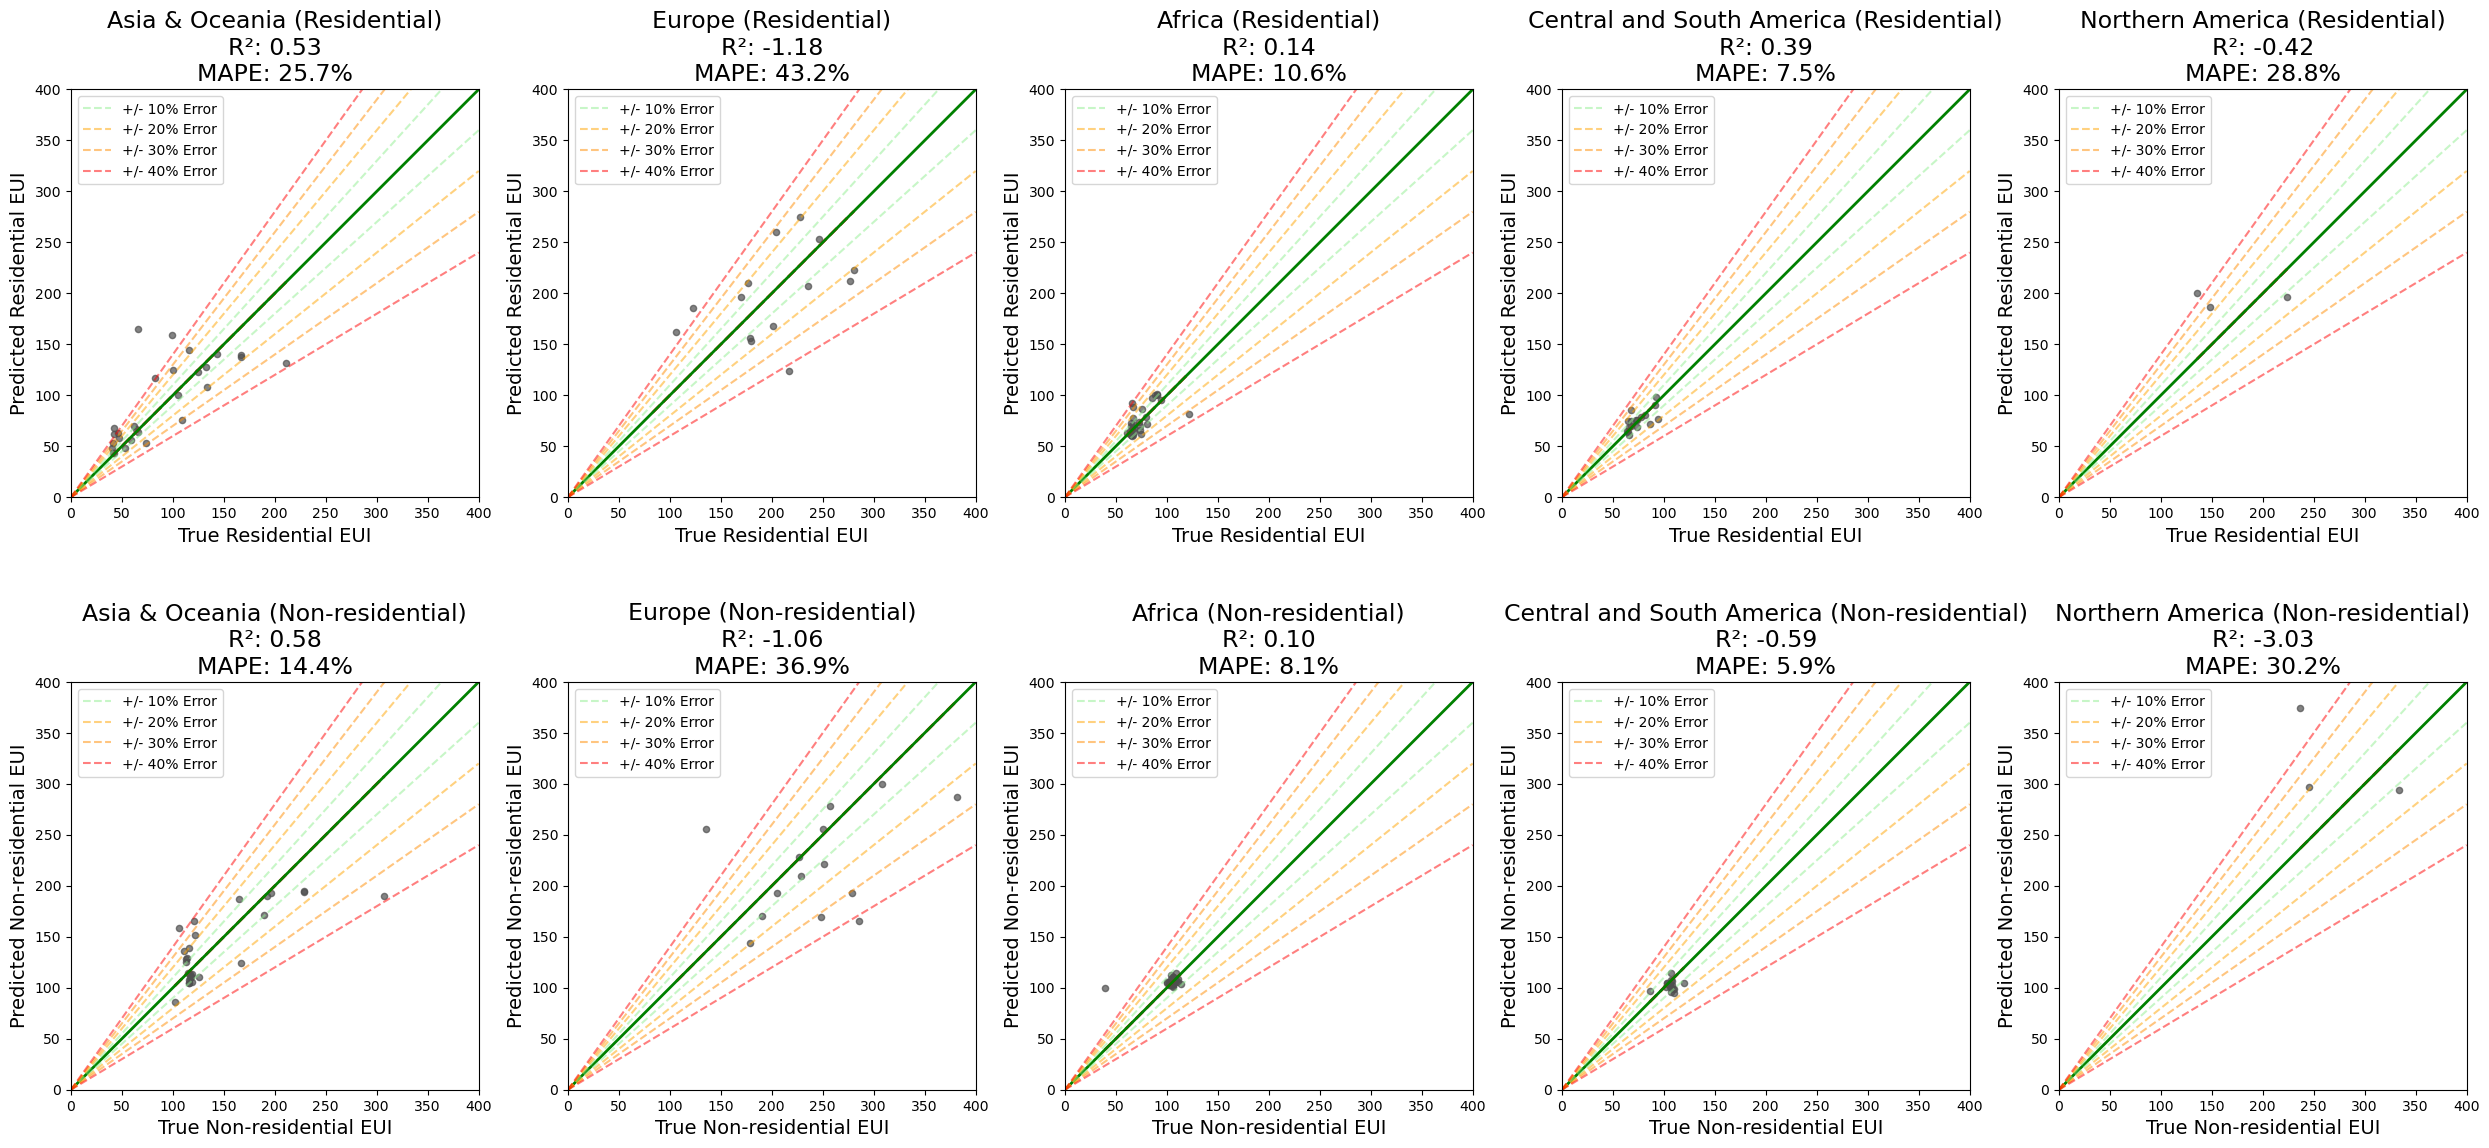

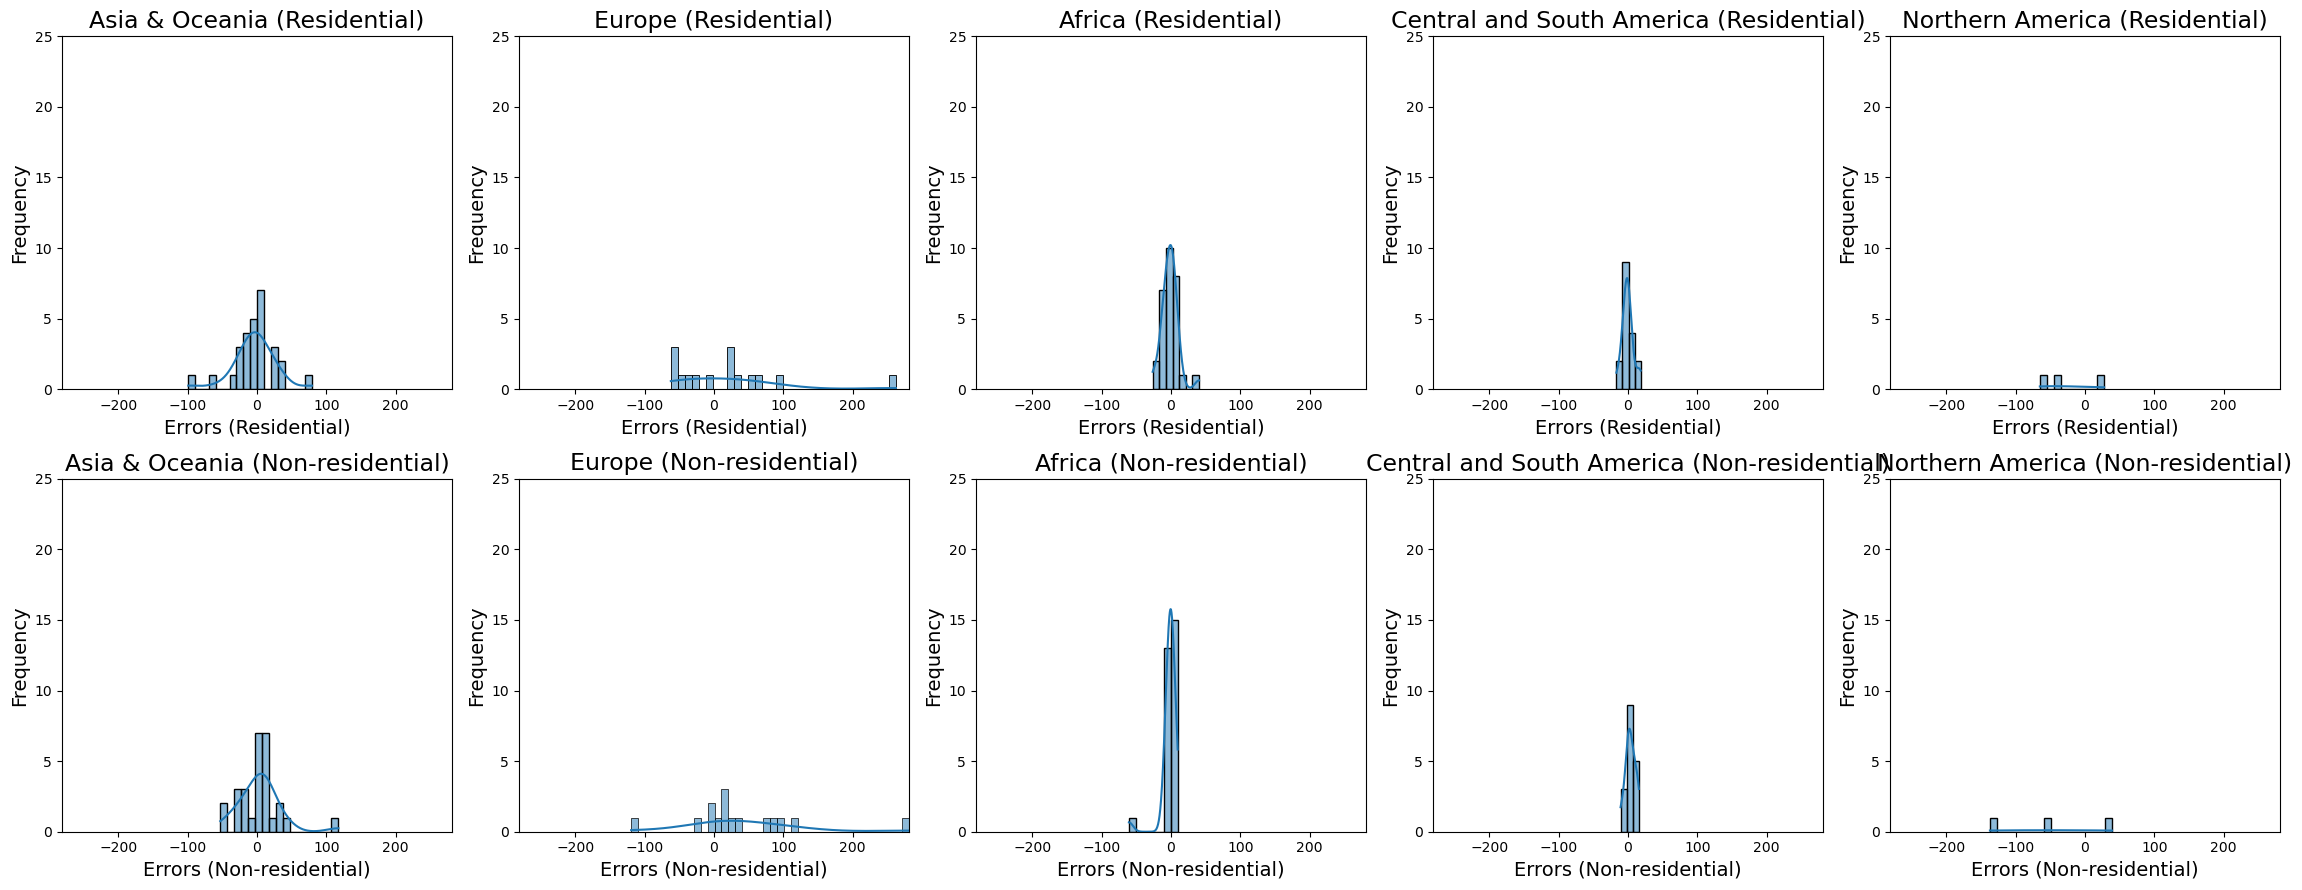

In [5]:
# Within-domain
model_lr_within = LinearRegression()
results_lr_within = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions, 
    features=features,
    model=model_lr_within,
    strategy='within_domain'
)

create_eui_comparison_plots(results_lr_within, 
    save_path='../figures/model_plots/lr_within_domain_eui_predictions.png')

create_error_distribution_plots(results_lr_within,
    save_path='../figures/model_plots/lr_within_domain_error_distribution.png')


### Linear Regression (Base Line Model) - Cross Domain

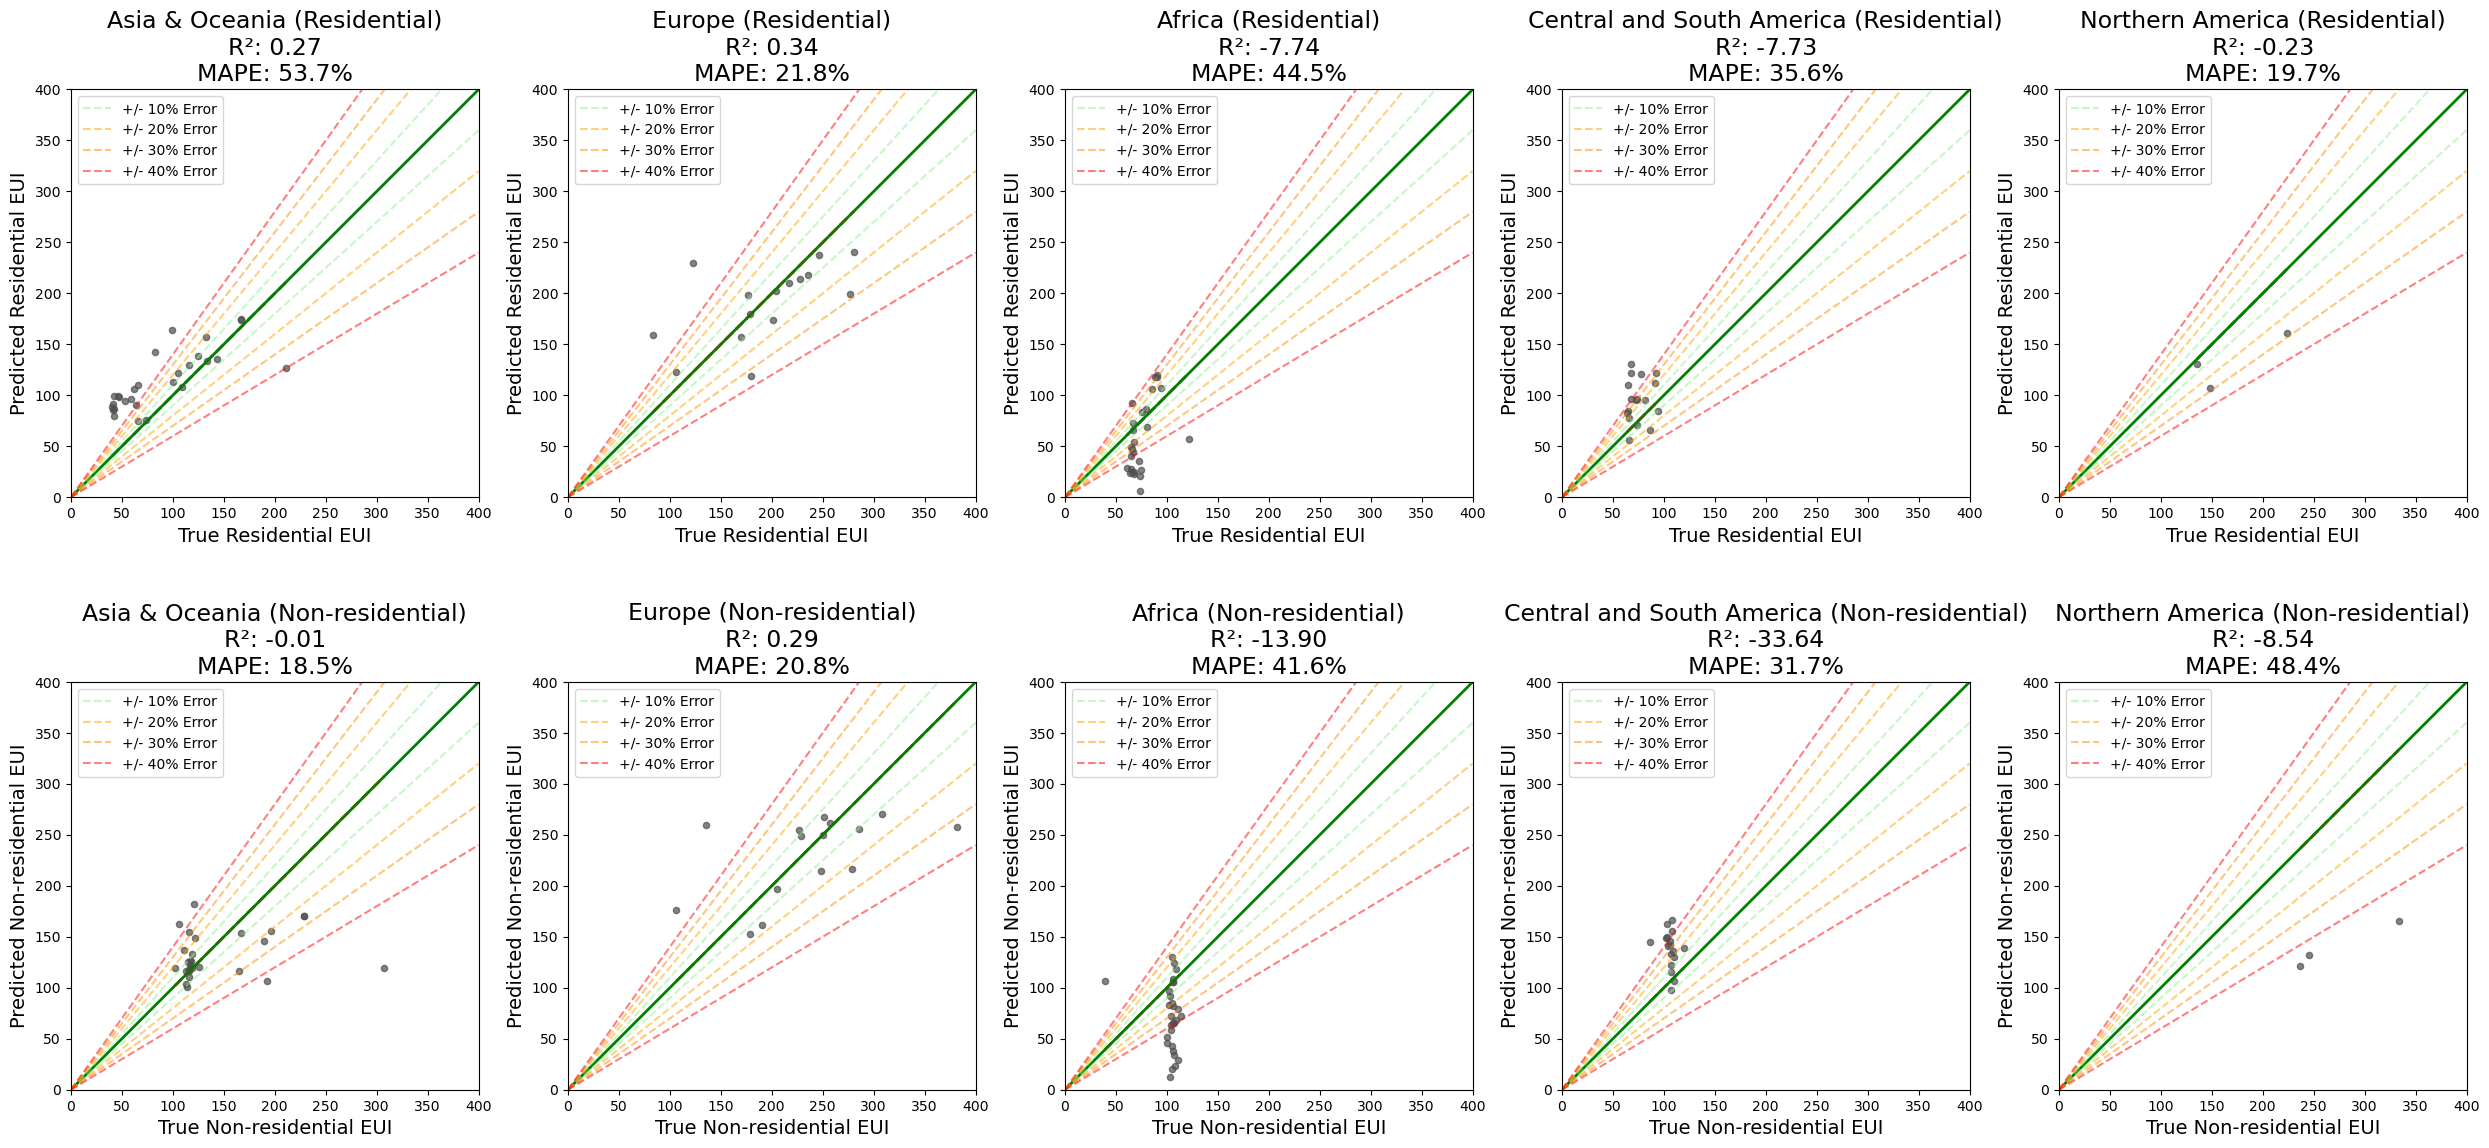

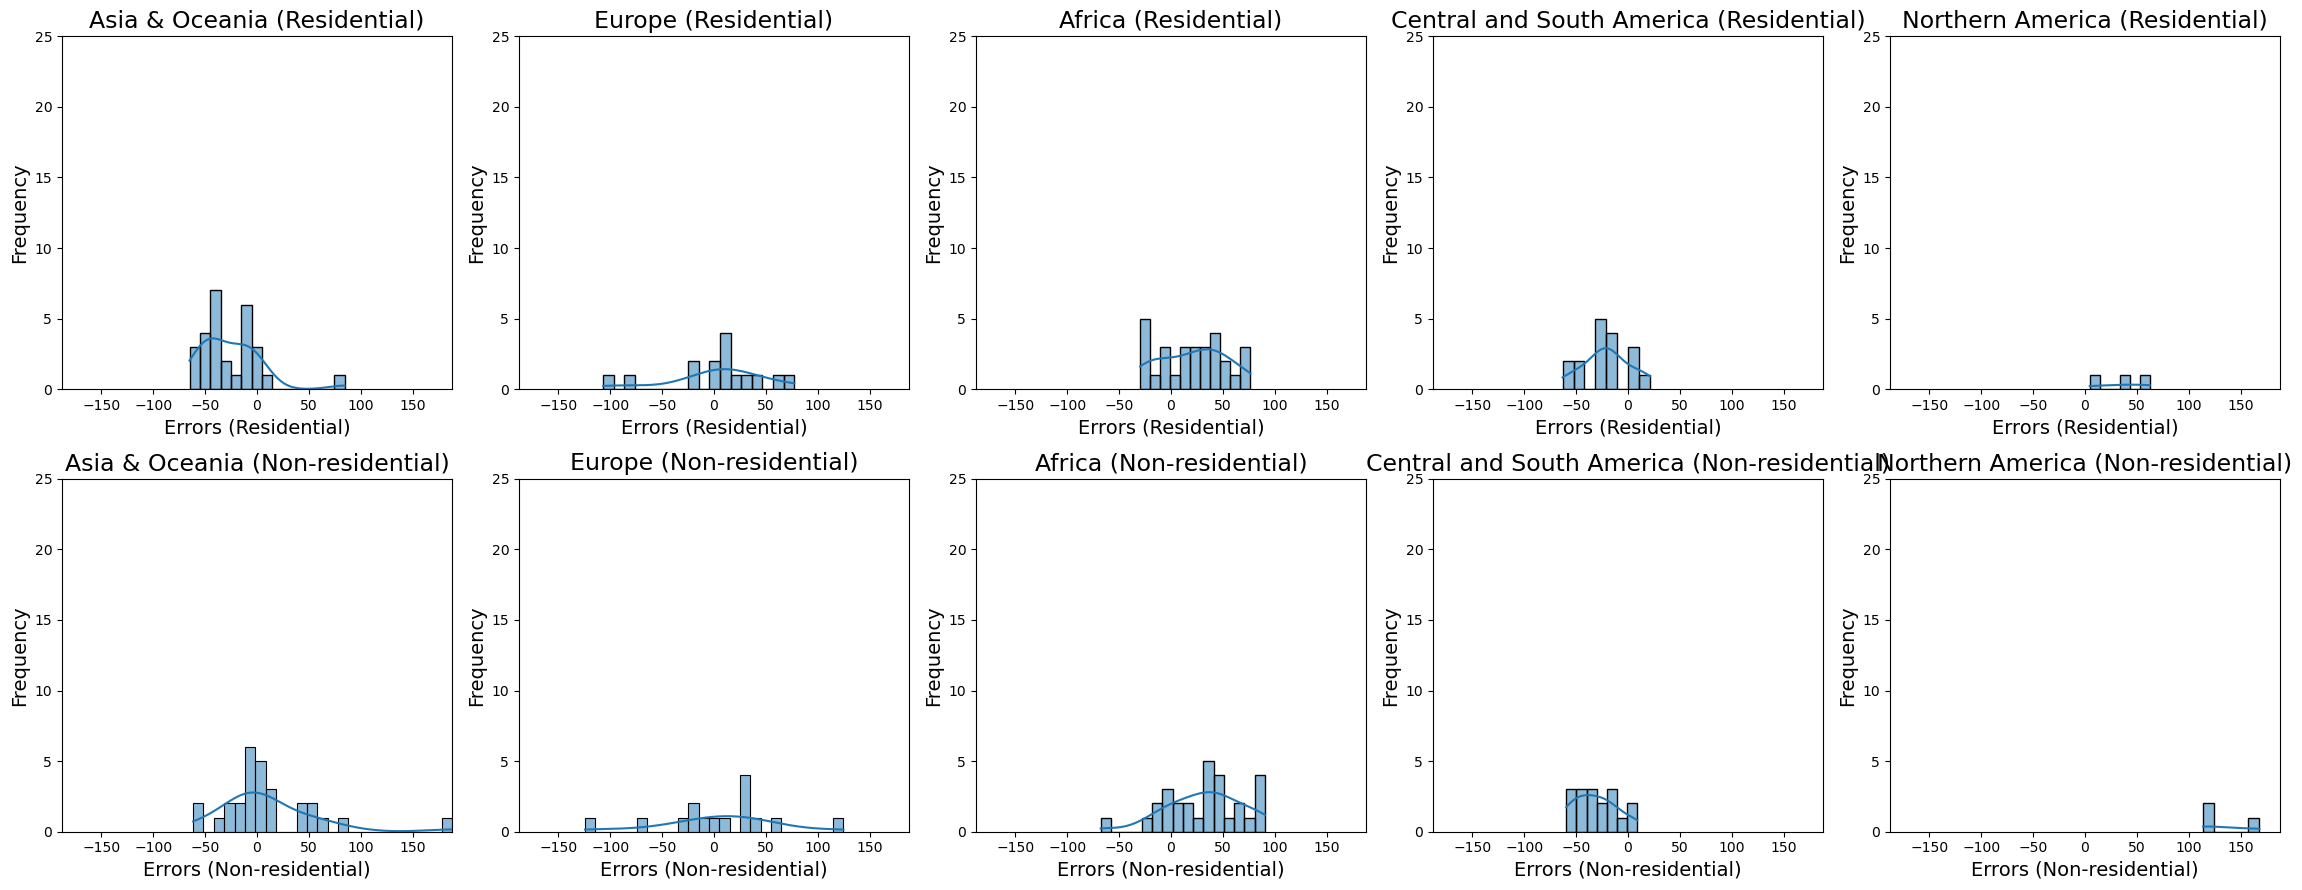

In [6]:
# Cross-domain 
model_lr_cross = LinearRegression()
results_lr_cross = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features, 
    model=model_lr_cross,
    strategy='cross_domain'
)

create_eui_comparison_plots(results_lr_cross,
    save_path='../figures/model_plots/lr_cross_domain_eui_predictions.png')

create_error_distribution_plots(results_lr_cross,
    save_path='../figures/model_plots/lr_cross_domain_error_distribution.png')

### Linear Regression (Base Line Model) - All Domain

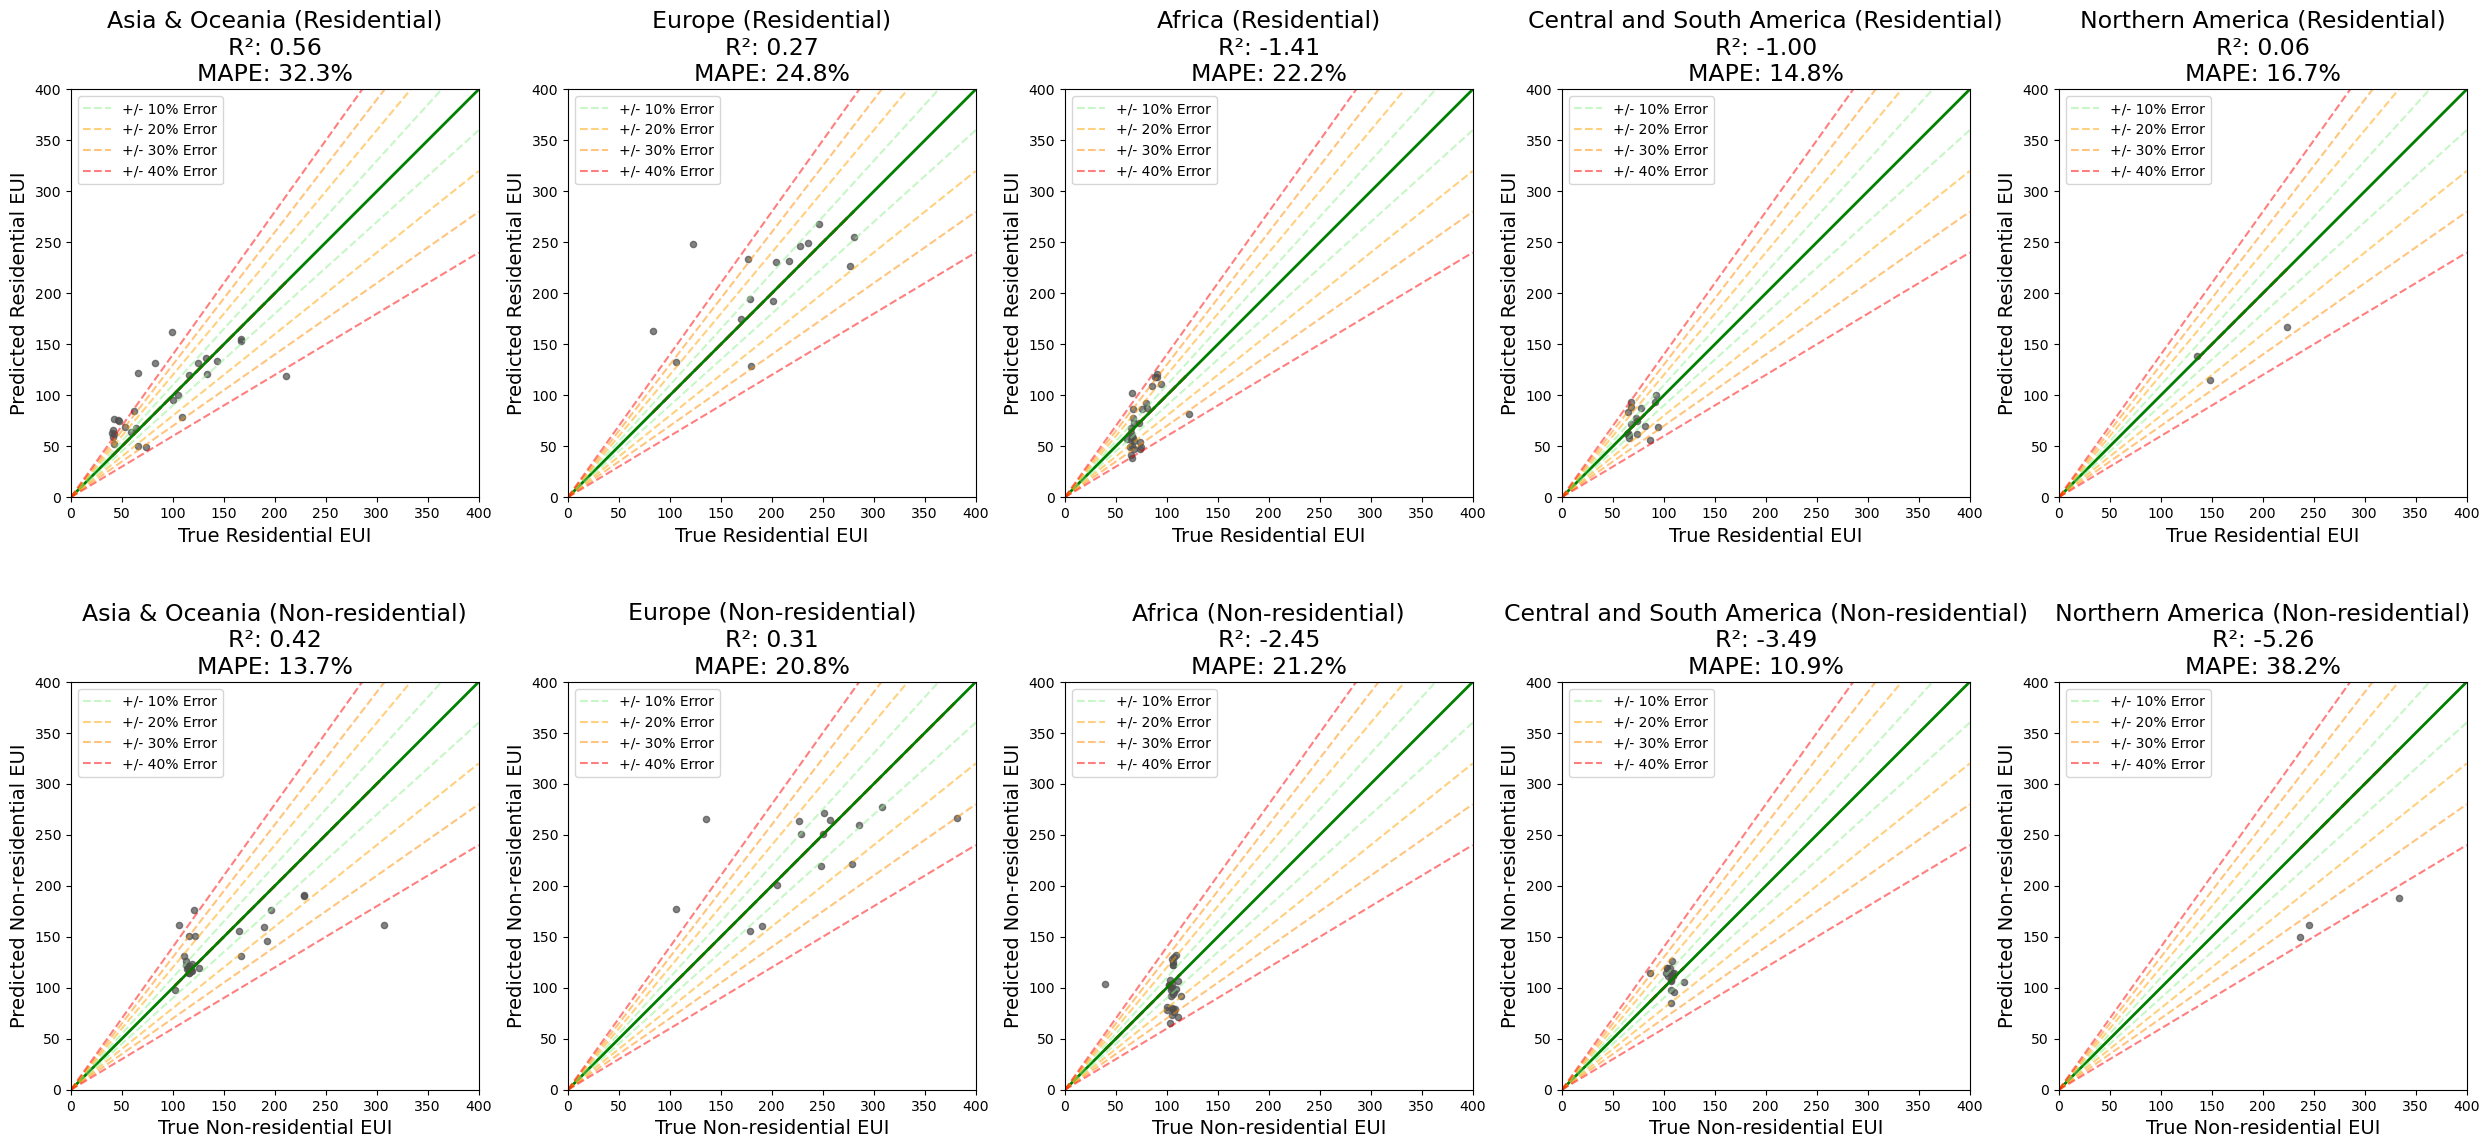

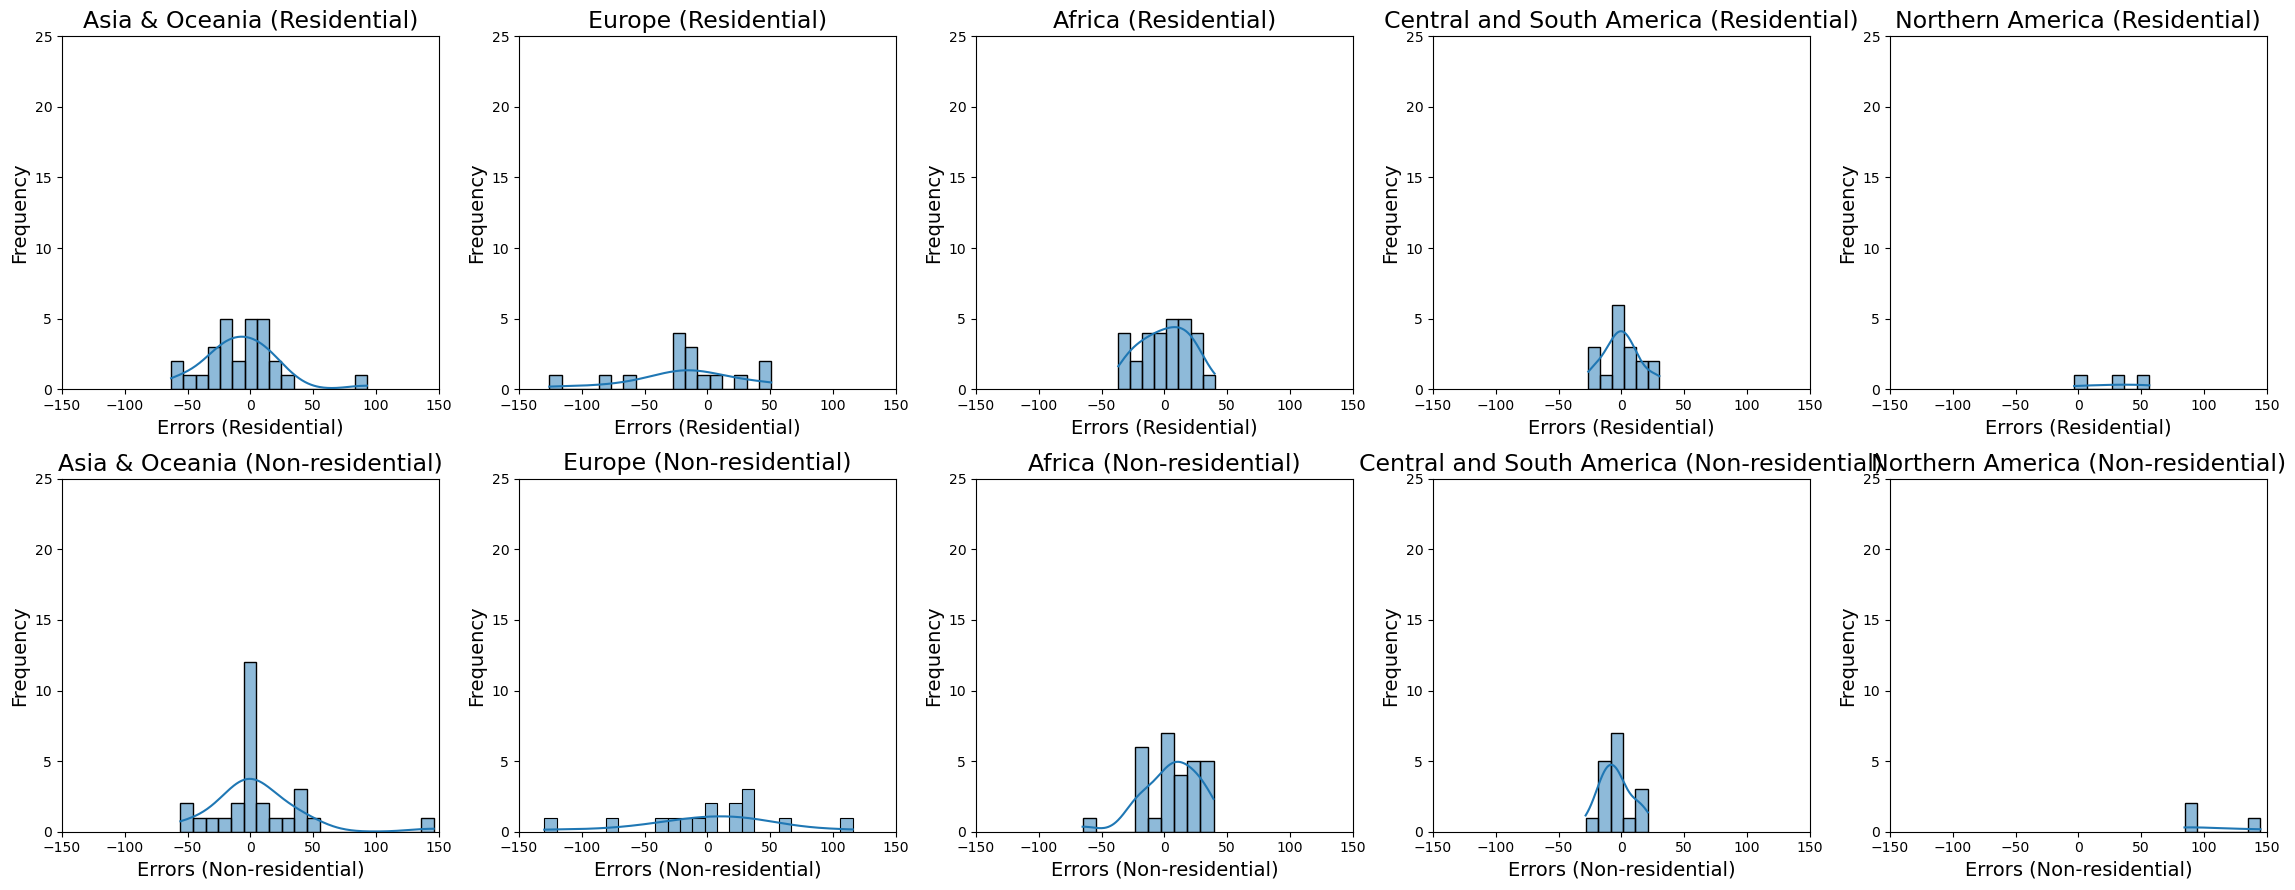

In [7]:
# All-domain
model_lr_all = LinearRegression()
results_lr_all = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features,
    model=model_lr_all, 
    strategy='all_domain'
)

create_eui_comparison_plots(results_lr_all,
    save_path='../figures/model_plots/lr_all_domain_eui_predictions.png')

create_error_distribution_plots(results_lr_all,
    save_path='../figures/model_plots/lr_all_domain_error_distribution.png')

In [8]:
lr_detailed_results = evaluate_model_strategies(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model_type=LinearRegression,
   feature_abbreviations=feature_abbreviations,
   model_details="No regularization"
)

lr_average_results = calculate_average_metrics(lr_detailed_results).reset_index()
lr_average_results

Target       Strategy             Model  \
0  Non-residential EUI (kWh/m2/year)  within_domain  LinearRegression   
1  Non-residential EUI (kWh/m2/year)   cross_domain  LinearRegression   
2  Non-residential EUI (kWh/m2/year)     all_domain  LinearRegression   
3      Residential EUI (kWh/m2/year)  within_domain  LinearRegression   
4      Residential EUI (kWh/m2/year)   cross_domain  LinearRegression   
5      Residential EUI (kWh/m2/year)     all_domain  LinearRegression   

       Model Details                                      Features Used  \
0  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
1  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
2  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
3  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
4  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
5  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   

                                Features Abbreviated   MAPE      R²       MSE  \
0  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  19.10  -0.800  3561.464   
1  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  32.20 -11.161  5469.984   
2  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  20.96  -2.093  3397.099   
3  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  23.16  -0.109  2039.349   
4  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  35.06  -3.017  1567.889   
5  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  22.16  -0.305  1053.139   

     RMSE     MAE   WAPE  
0  46.686  34.174  16.02  
1  64.970  55.357  31.44  
2  47.505  39.594  20.06  
3  36.129  27.466  19.74  
4  39.257  31.833  30.50  
5  30.151  23.605  20.08

In [9]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
lr_detailed_results.to_csv(f'../results/{timestamp}_lr_detailed_results.csv')
lr_average_results.to_csv(f'../results/{timestamp}_lr_average_results.csv')

# 

# Linear Regression - Ridge regularization

In [10]:
ridge_params = {
    'alpha': 1.0,          # regularization strength
   # 'fit_intercept': True, # include bias term
   # 'max_iter': 1000,      # maximum iterations
   # 'tol': 1e-3,          # tolerance for optimization
   # 'solver': 'auto',      # solver algorithm
   # 'random_state': 42     # for reproducibility
}

### Linear Regression - Ridge - Within Domain

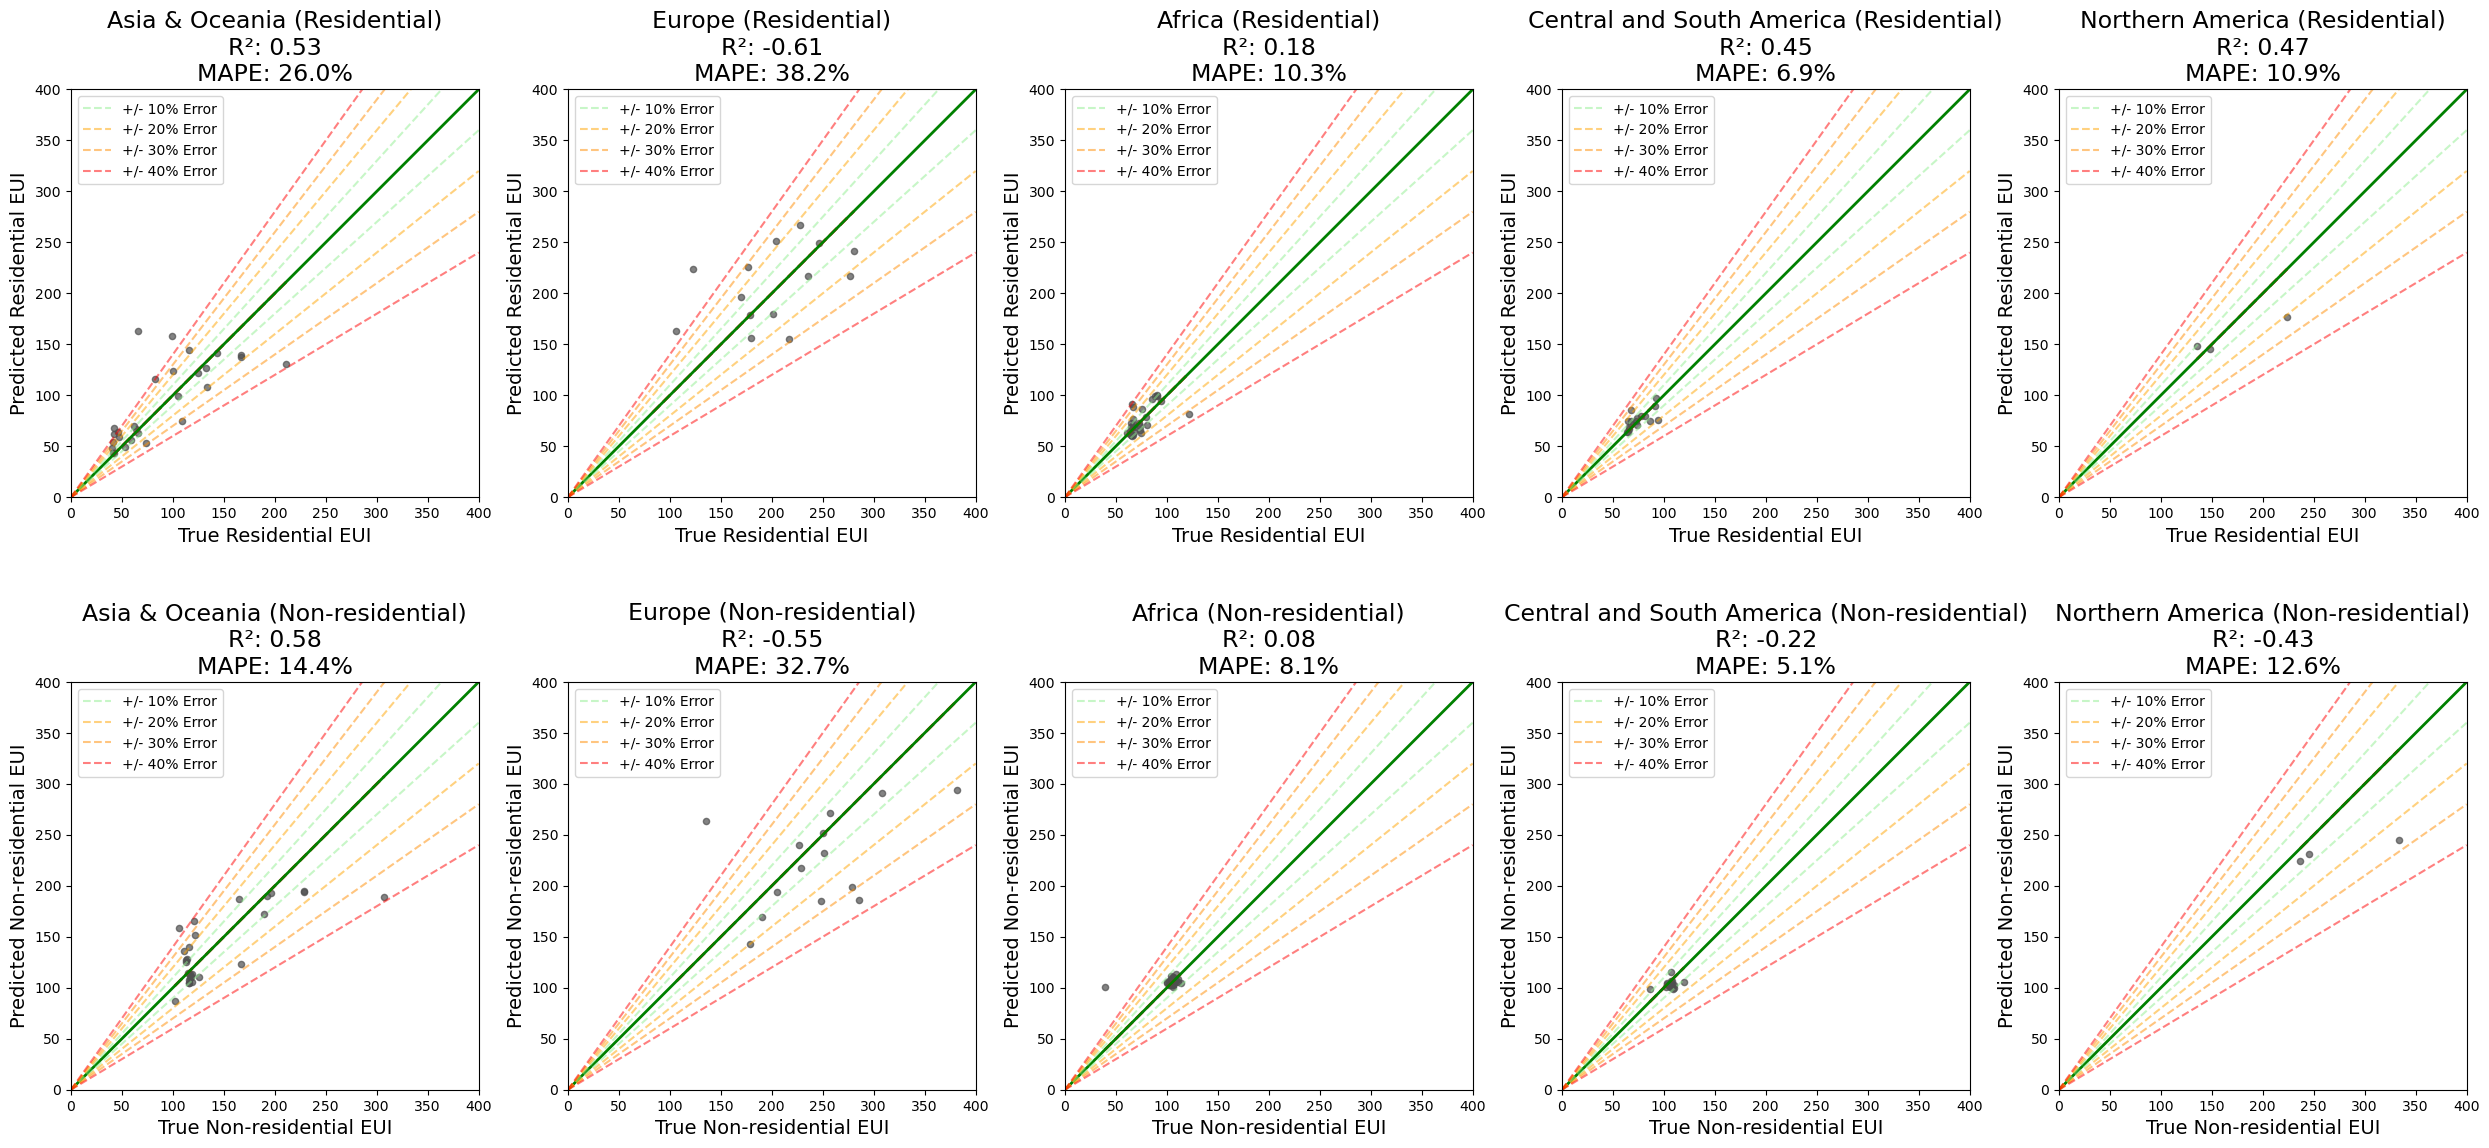

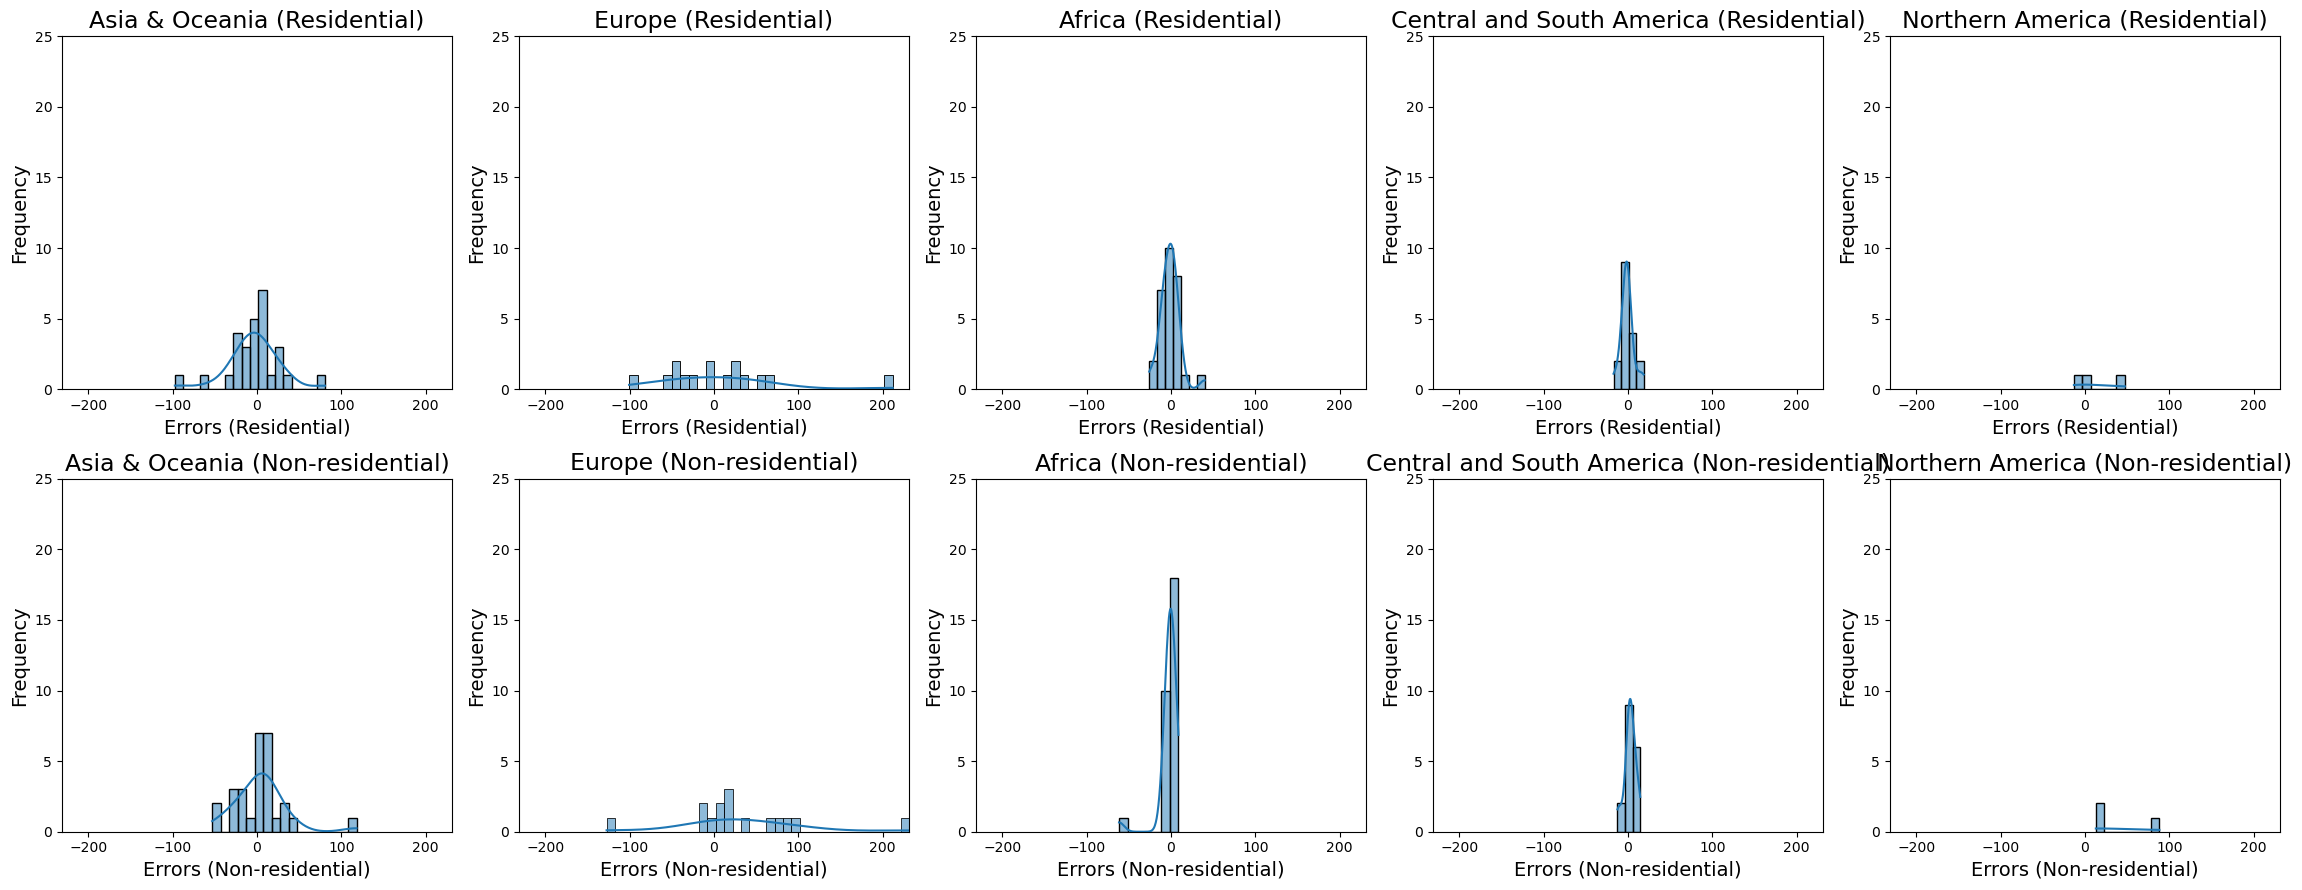

In [11]:
# Within-domain with Ridge
model_ridge_within = Ridge(**ridge_params)
results_ridge_within = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions, 
    features=features,
    model=model_ridge_within,
    strategy='within_domain'
)

create_eui_comparison_plots(results_ridge_within, 
    save_path='../figures/model_plots/ridge_within_domain_eui_predictions.png')

create_error_distribution_plots(results_ridge_within,
    save_path='../figures/model_plots/ridge_within_domain_error_distribution.png')

### Linear Regression - Ridge - Cross Domain

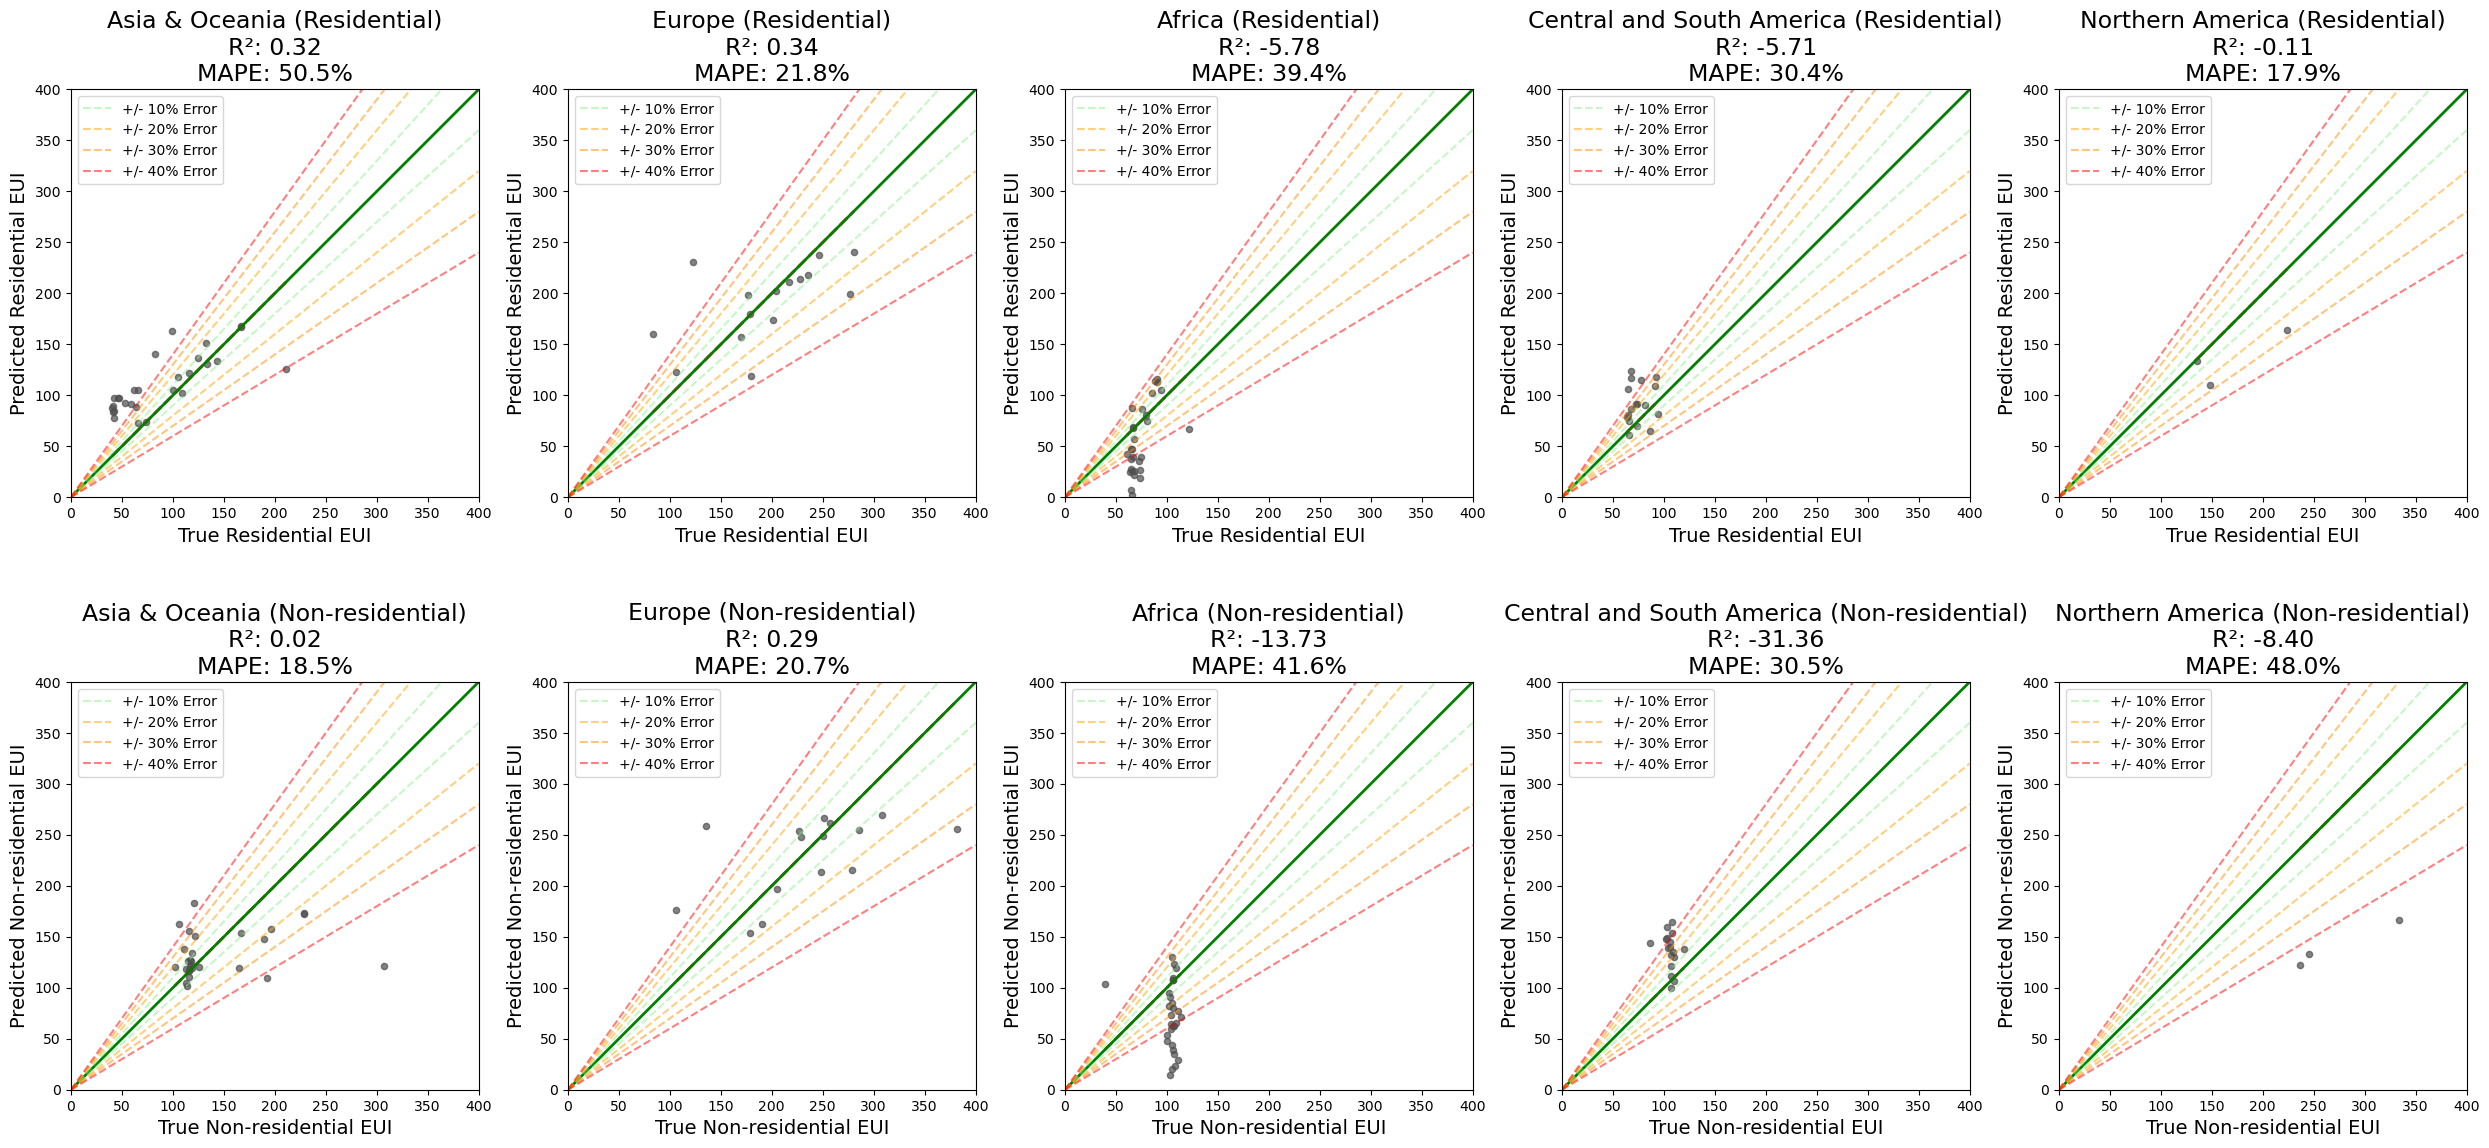

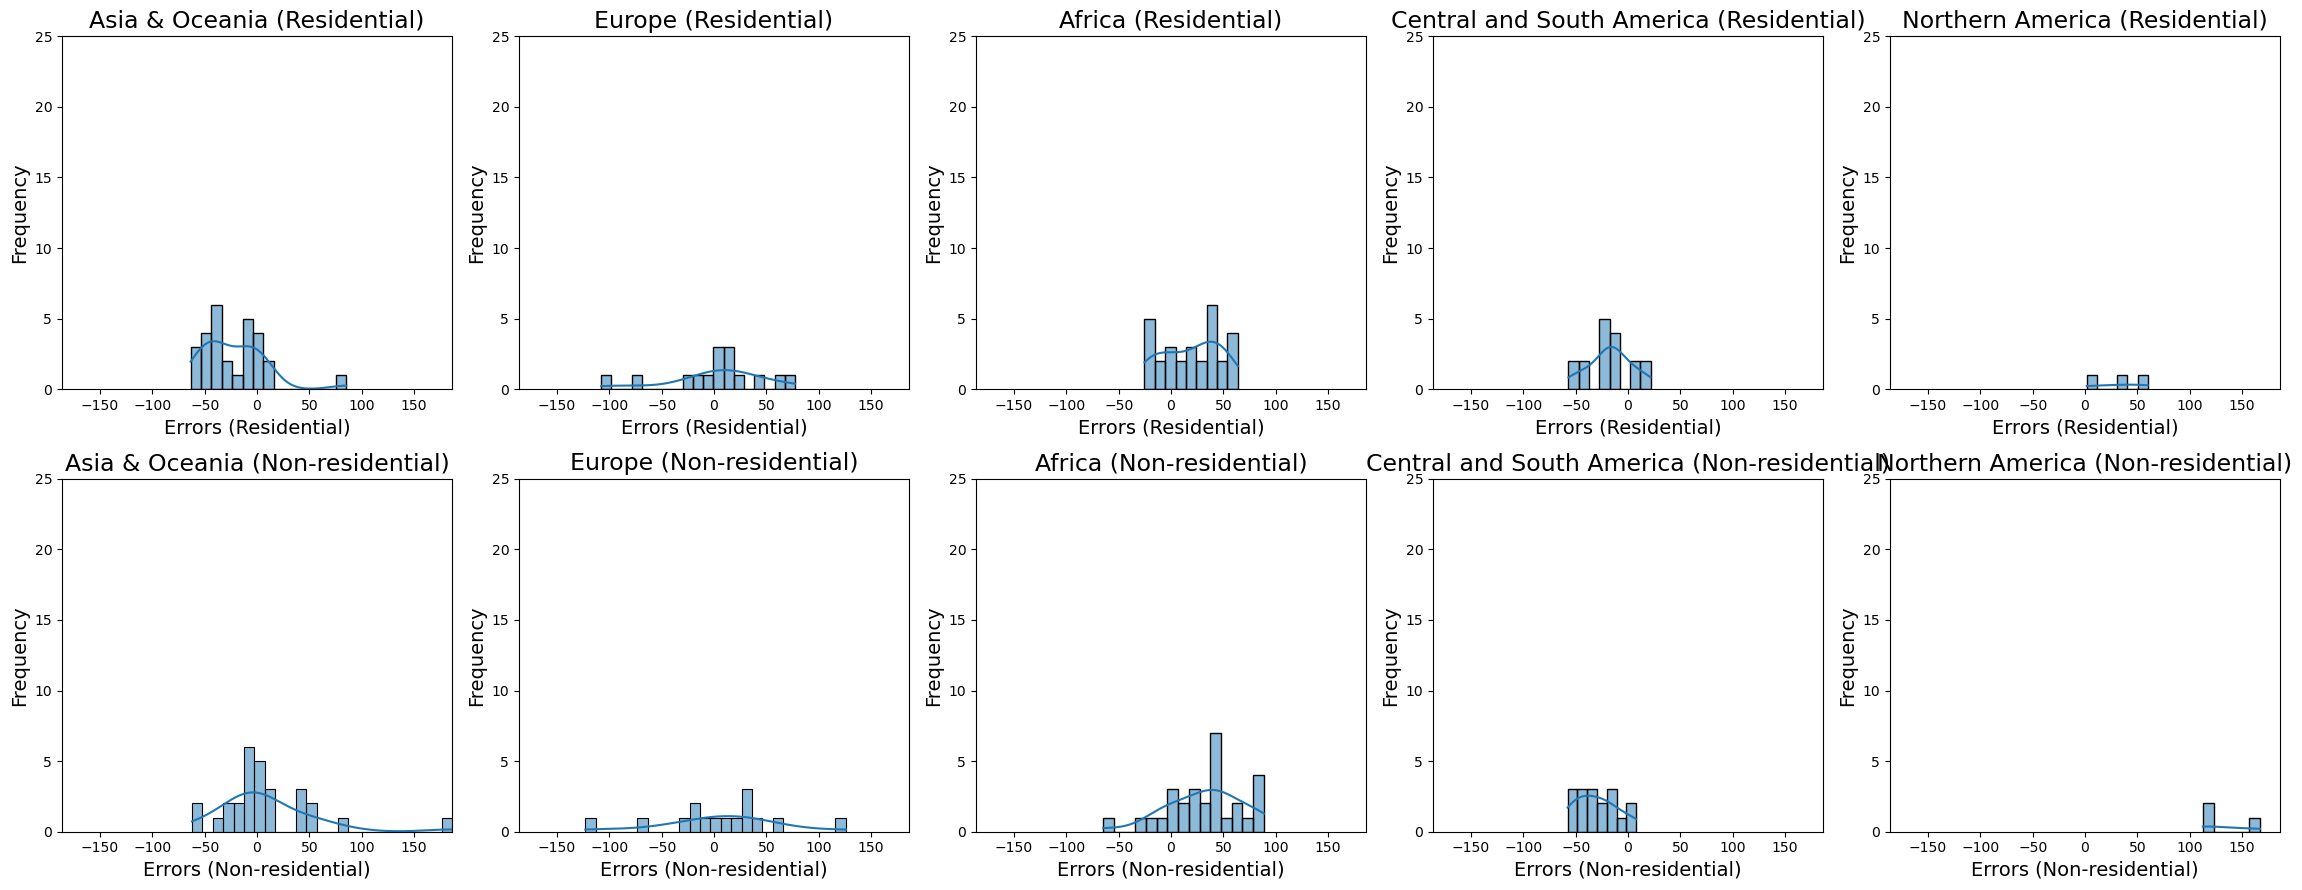

In [12]:
# Cross-domain with Ridge
model_ridge_cross = Ridge(**ridge_params)
results_ridge_cross = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features, 
    model=model_ridge_cross,
    strategy='cross_domain'
)

create_eui_comparison_plots(results_ridge_cross,
    save_path='../figures/model_plots/ridge_cross_domain_eui_predictions.png')

create_error_distribution_plots(results_ridge_cross,
    save_path='../figures/model_plots/ridge_cross_domain_error_distribution.png')


### Linear Regression - Ridge - All Domain

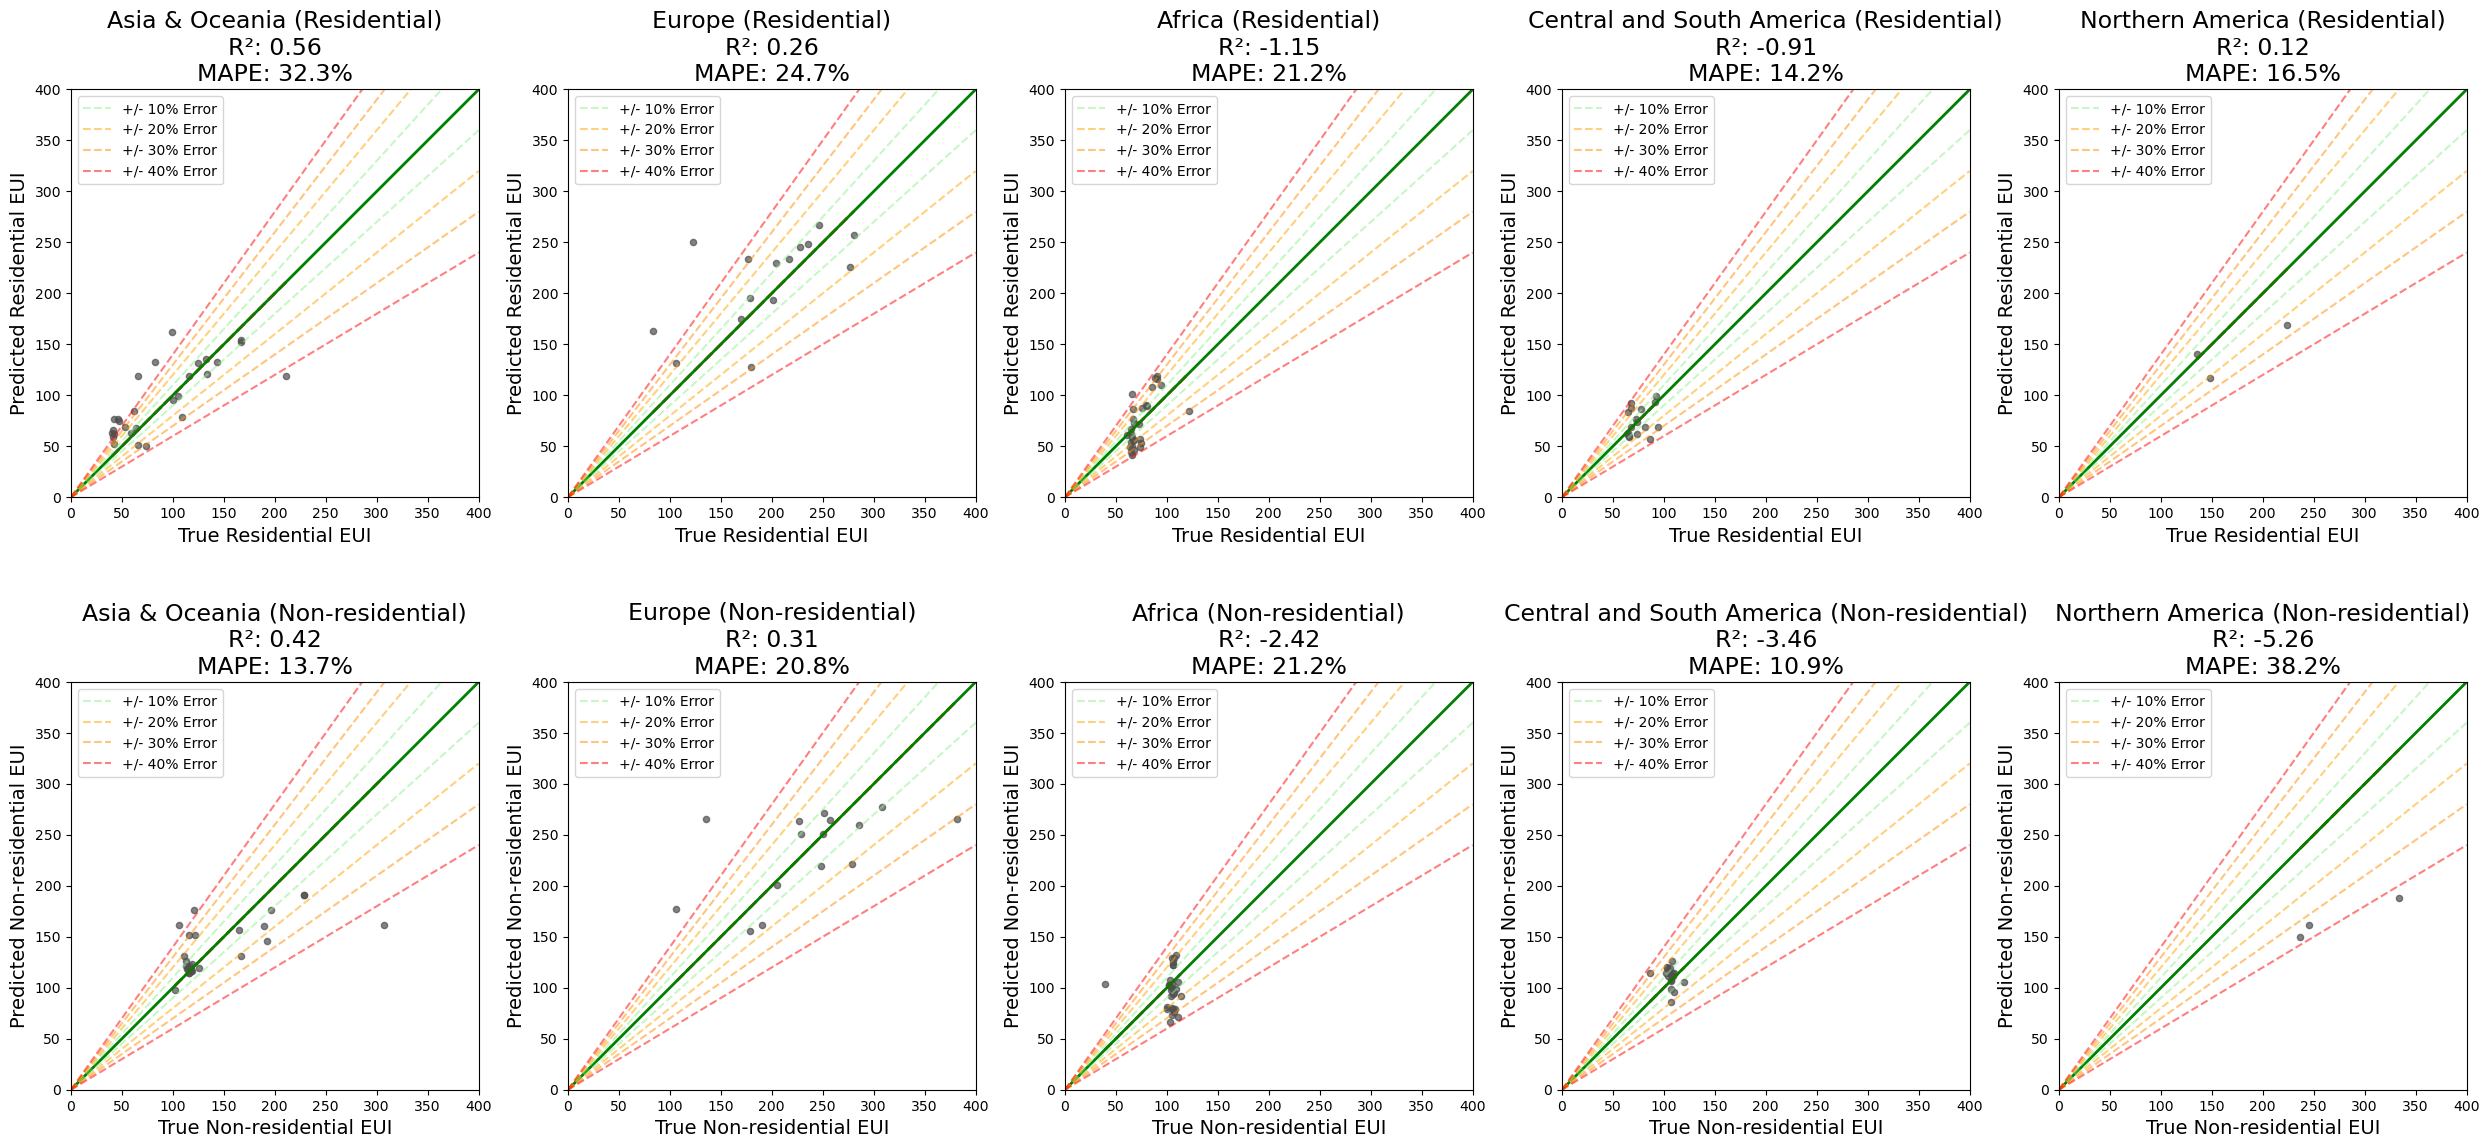

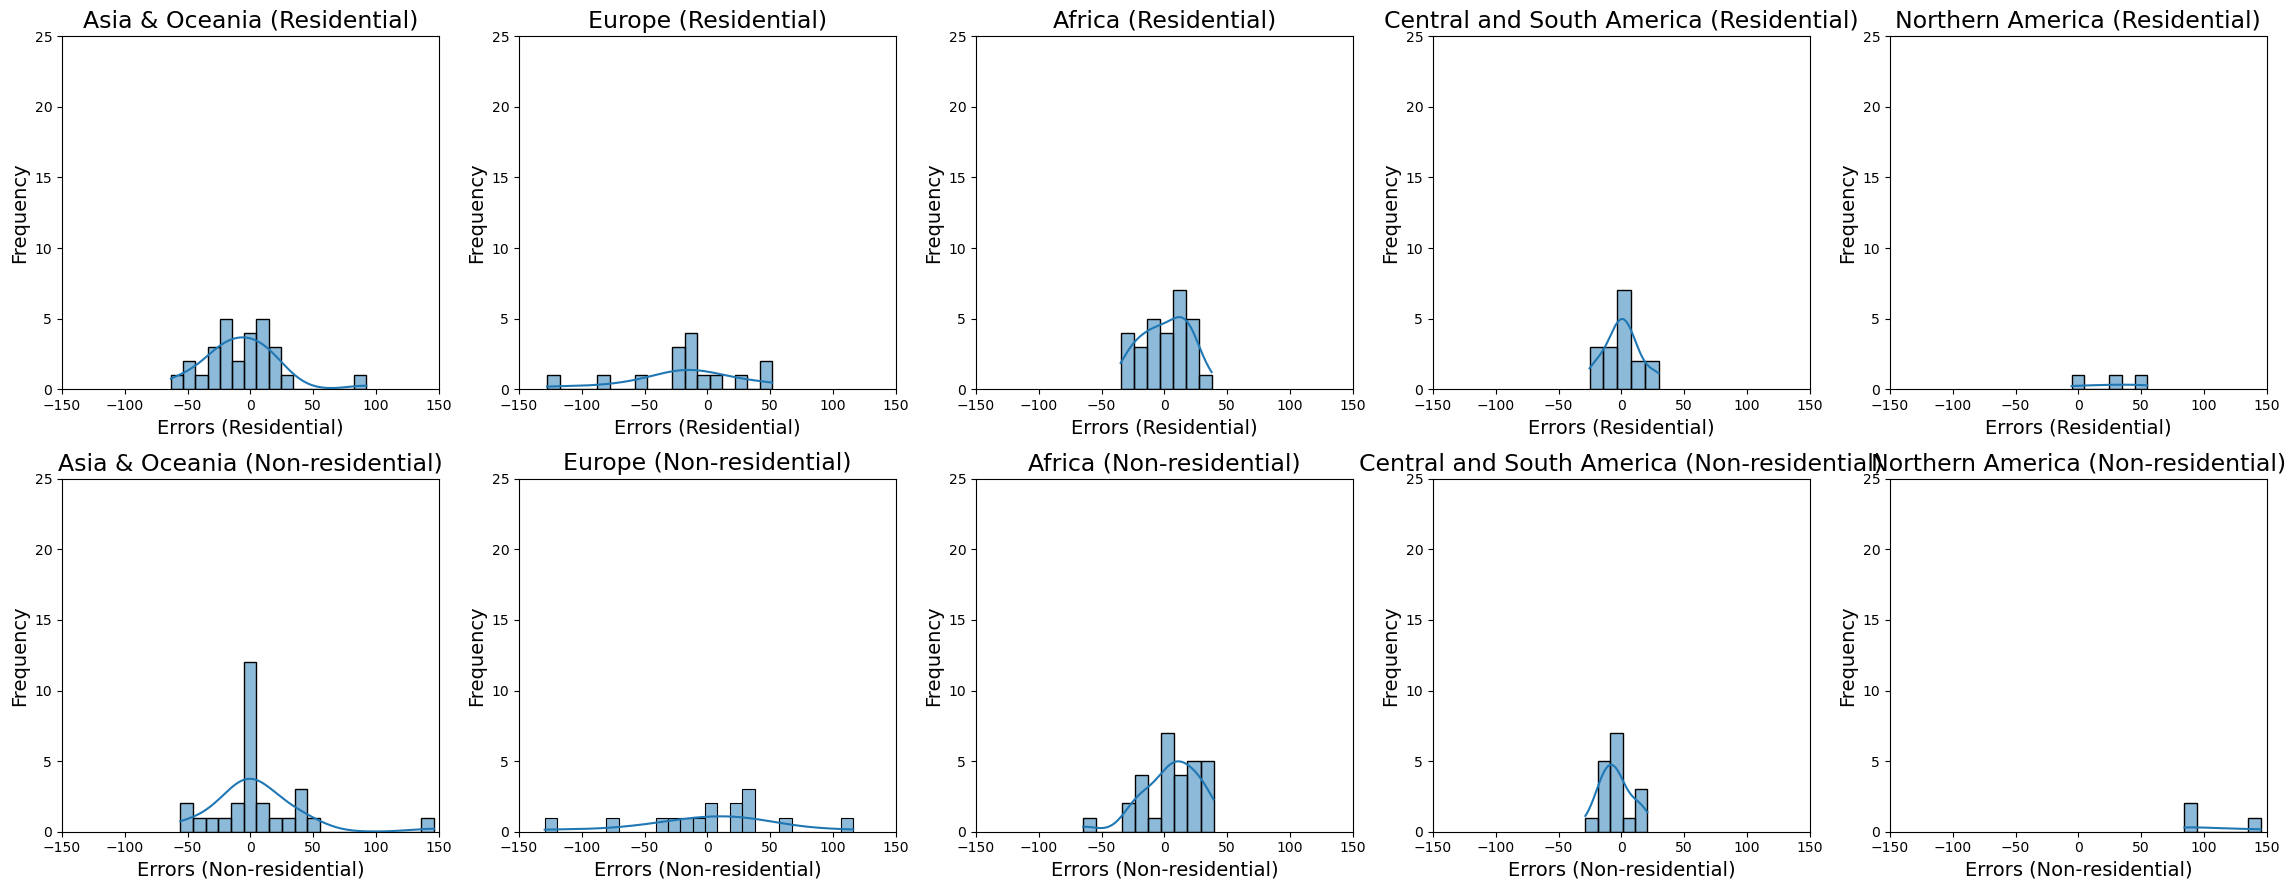

In [13]:
model_ridge_all = Ridge(**ridge_params)
results_ridge_all = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features,
    model=model_ridge_all, 
    strategy='all_domain'
)

create_eui_comparison_plots(results_ridge_all,
    save_path='../figures/model_plots/ridge_all_domain_eui_predictions.png')

create_error_distribution_plots(results_ridge_all,
    save_path='../figures/model_plots/ridge_all_domain_error_distribution.png')

In [14]:
RidgeModel = lambda: Ridge(**ridge_params)

ridge_detailed_results = evaluate_model_strategies(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model_type=RidgeModel,
   feature_abbreviations=feature_abbreviations,
   model_details="Ridge, " + ", ".join(f"{k}={v}" for k, v in ridge_params.items())
)
ridge_detailed_results['Model'] = 'LR Ridge'
ridge_average_results = calculate_average_metrics(ridge_detailed_results).reset_index()

ridge_average_results

Target       Strategy     Model  \
0  Non-residential EUI (kWh/m2/year)  within_domain  LR Ridge   
1  Non-residential EUI (kWh/m2/year)   cross_domain  LR Ridge   
2  Non-residential EUI (kWh/m2/year)     all_domain  LR Ridge   
3      Residential EUI (kWh/m2/year)  within_domain  LR Ridge   
4      Residential EUI (kWh/m2/year)   cross_domain  LR Ridge   
5      Residential EUI (kWh/m2/year)     all_domain  LR Ridge   

      Model Details                                      Features Used  \
0  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
1  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
2  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
3  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
4  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
5  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   

                                Features Abbreviated   MAPE      R²       MSE  \
0  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  14.58  -0.108  2126.456   
1  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  31.86 -10.637  5381.126   
2  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  20.96  -2.083  3396.400   
3  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  18.46   0.204  1406.439   
4  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  32.00  -2.187  1401.293   
5  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  21.78  -0.223  1026.706   

     RMSE     MAE   WAPE  
0  36.938  25.203  12.54  
1  64.345  54.872  31.12  
2  47.487  39.582  20.04  
3  30.029  21.274  16.12  
4  36.872  29.295  27.64  
5  29.628  23.216  19.68

In [15]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M")

ridge_detailed_results.to_csv(f'../results/{timestamp}_ridge_detailed_results.csv')
ridge_average_results.to_csv(f'../results/{timestamp}_ridge_average_results.csv')


# Linear Regression - Lasso regularization

In [16]:
lasso_params = {
    'alpha': 1.0,          # regularization strength
  #  'fit_intercept': True, # include bias term
  #  'max_iter': 1000,      # maximum iterations
  #  'tol': 1e-4,          # tolerance for optimization
  #  'selection': 'cyclic', # feature selection method
  #  'random_state': 42     # for reproducibility
}

### Linear Regression - Lasso - Within Domain

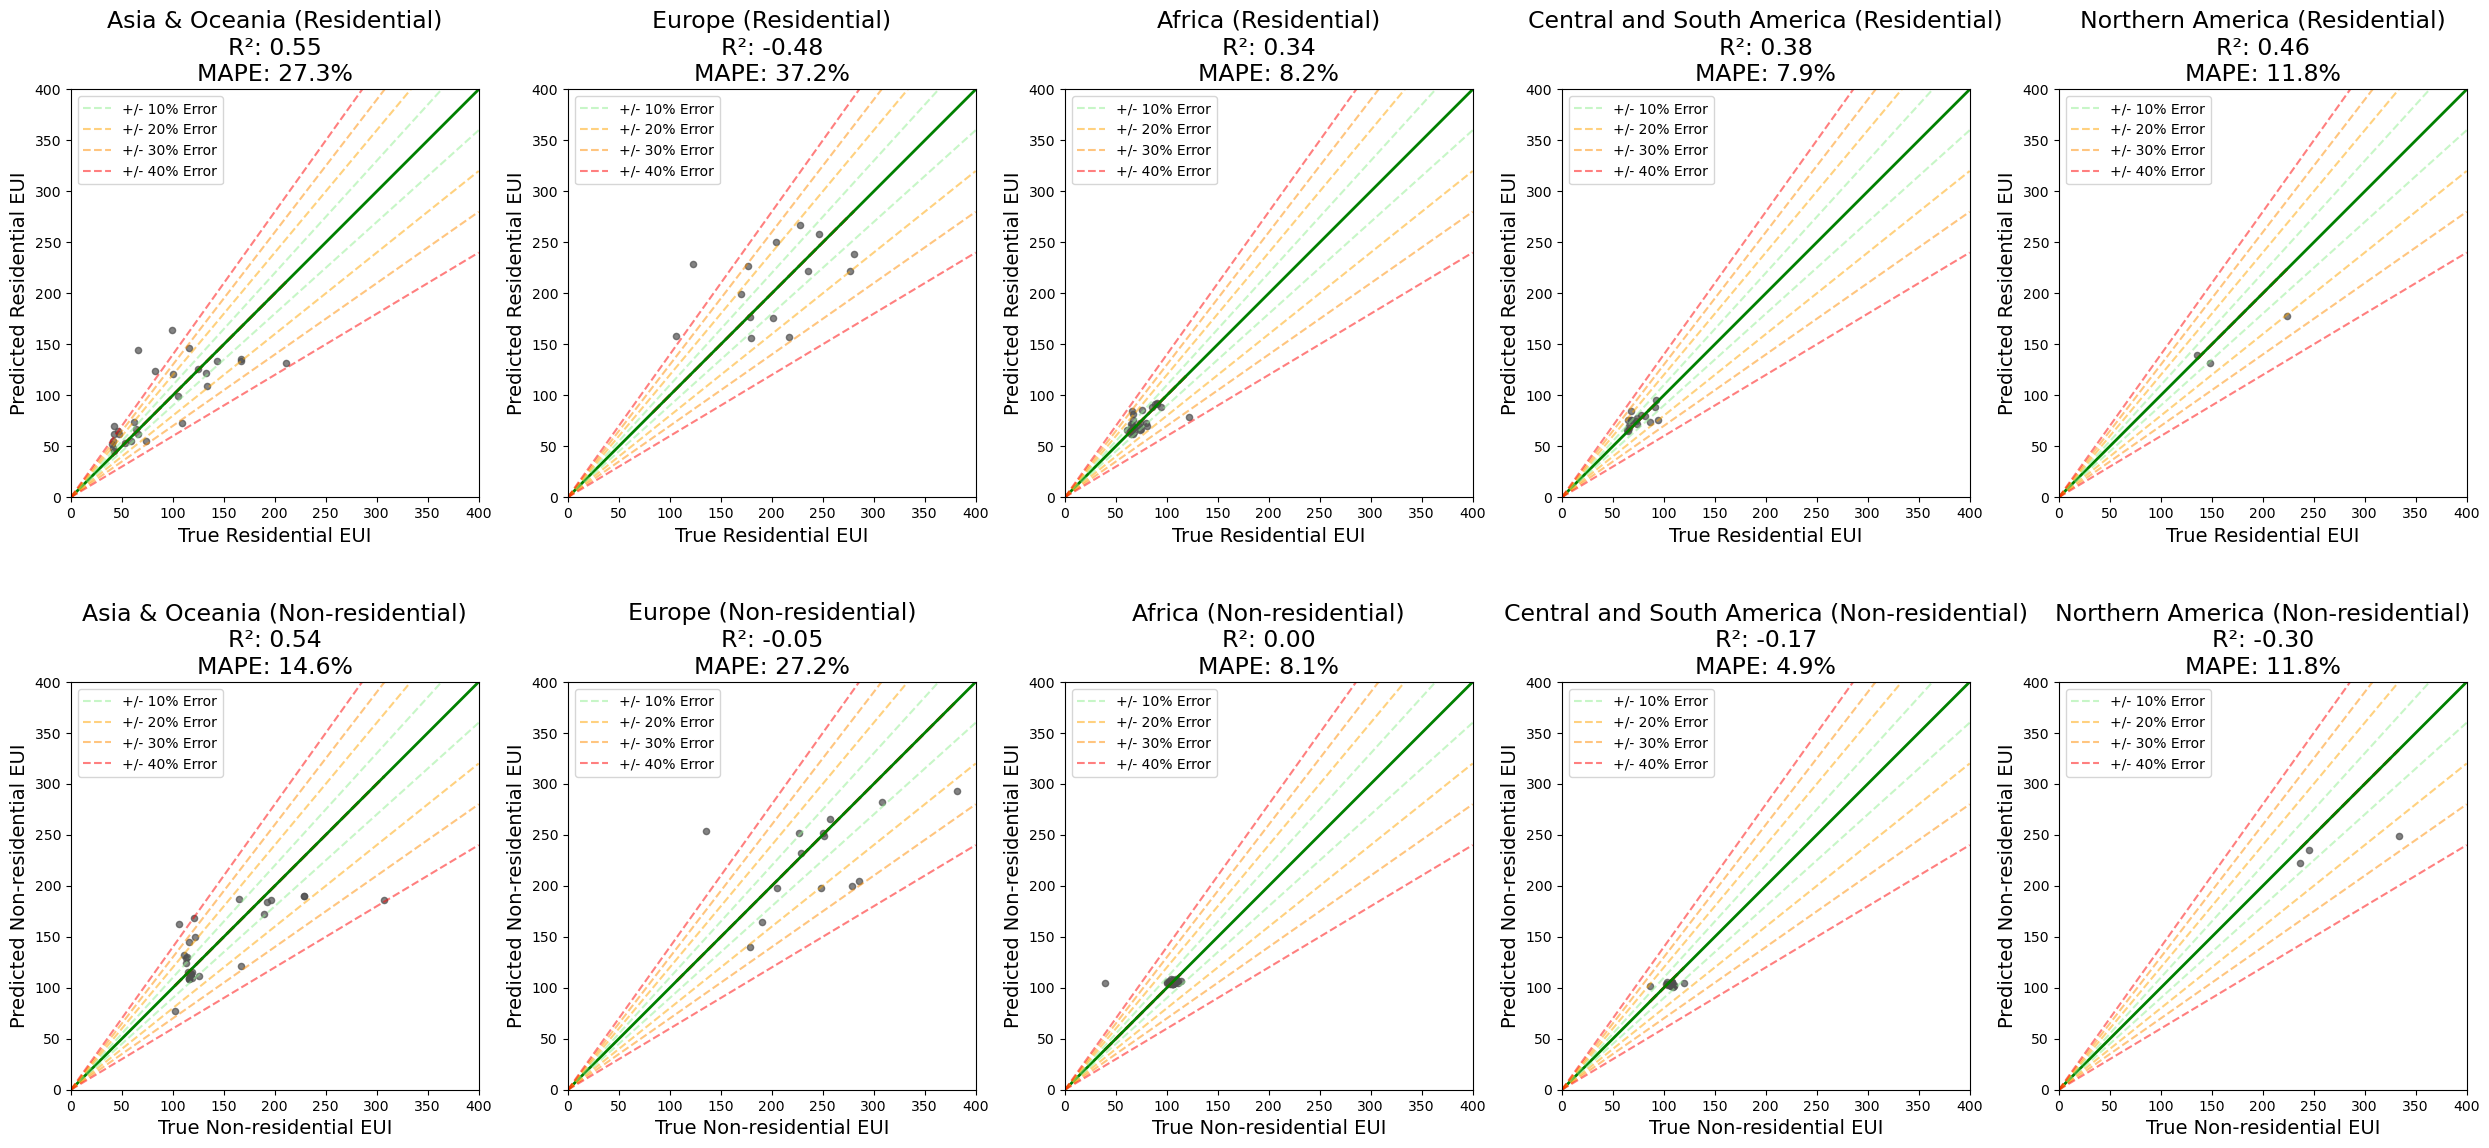

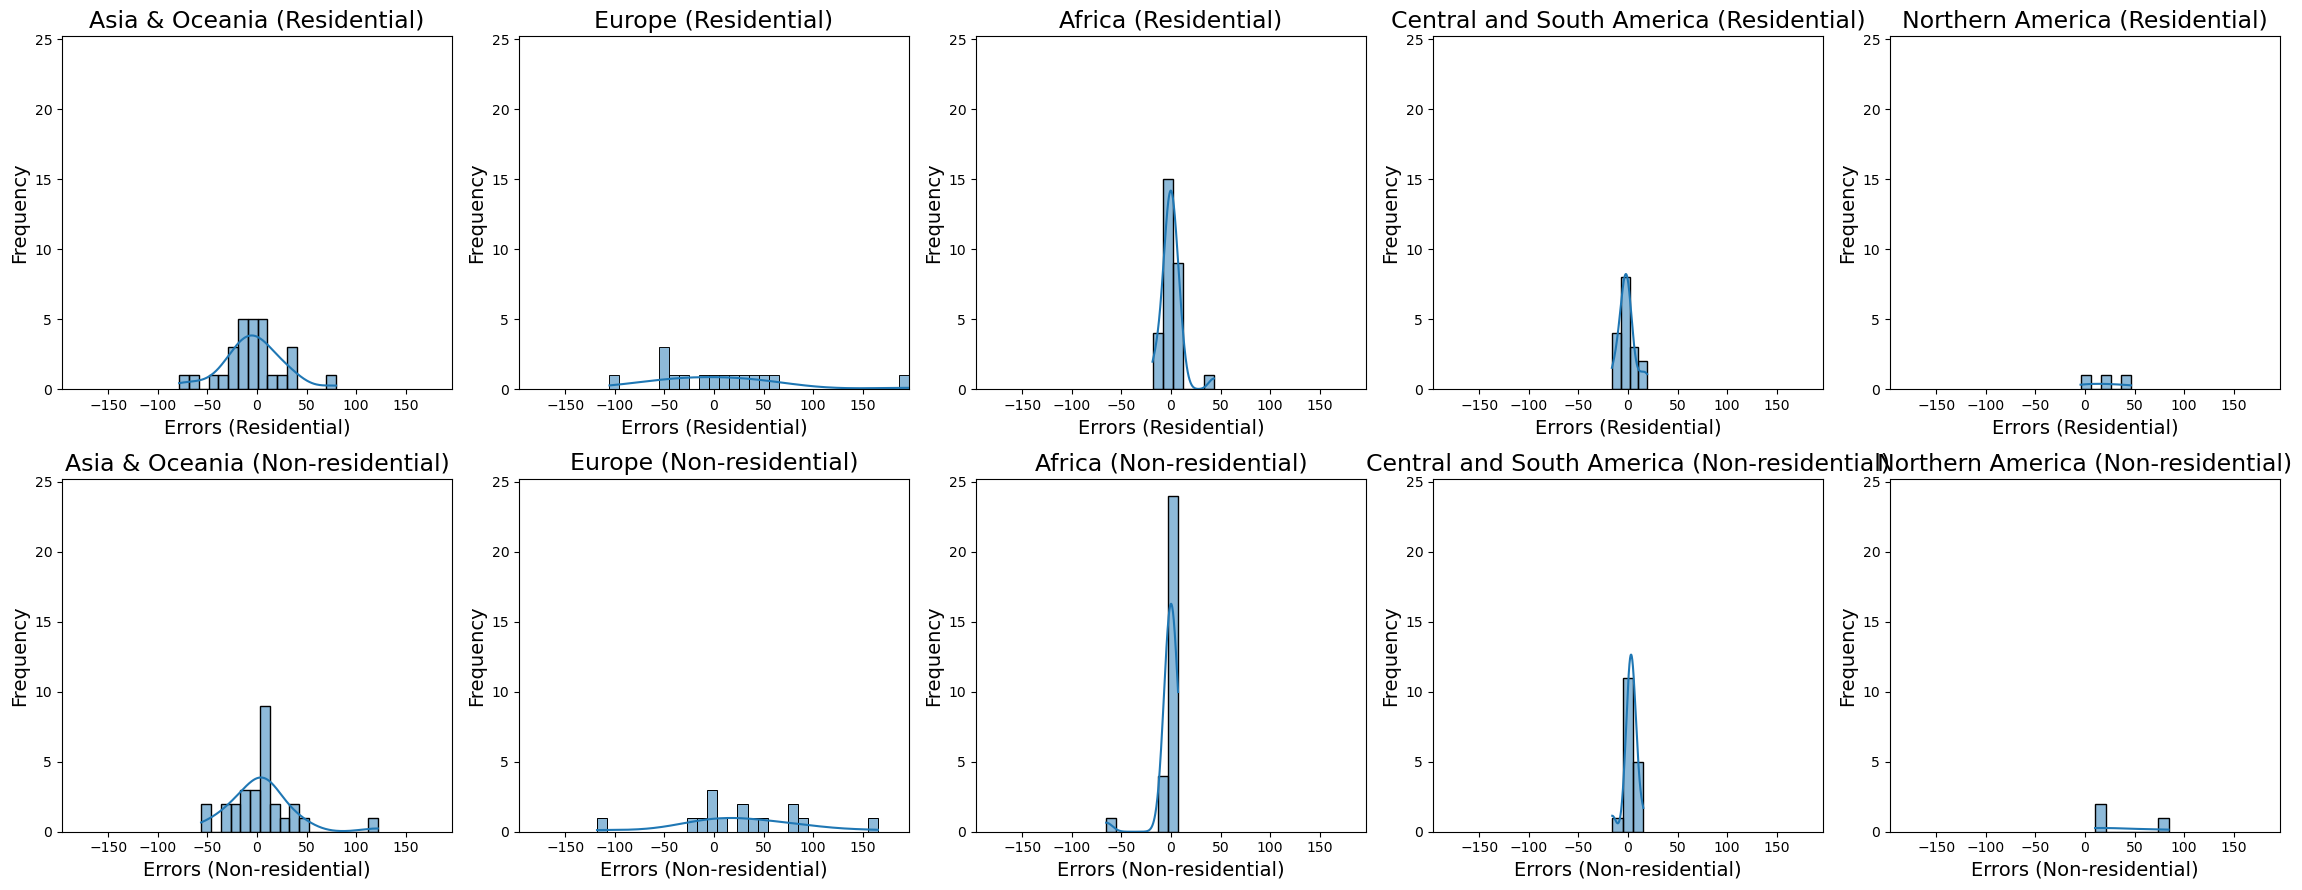

In [17]:
# Within-domain with Lasso
model_lasso_within = Lasso(**lasso_params)
results_lasso_within = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions, 
    features=features,
    model=model_lasso_within,
    strategy='within_domain'
)

create_eui_comparison_plots(results_lasso_within, 
    save_path='../figures/model_plots/lasso_within_domain_eui_predictions.png')

create_error_distribution_plots(results_lasso_within,
    save_path='../figures/model_plots/lasso_within_domain_error_distribution.png')


### Linear Regression - Lasso - Cross Domain

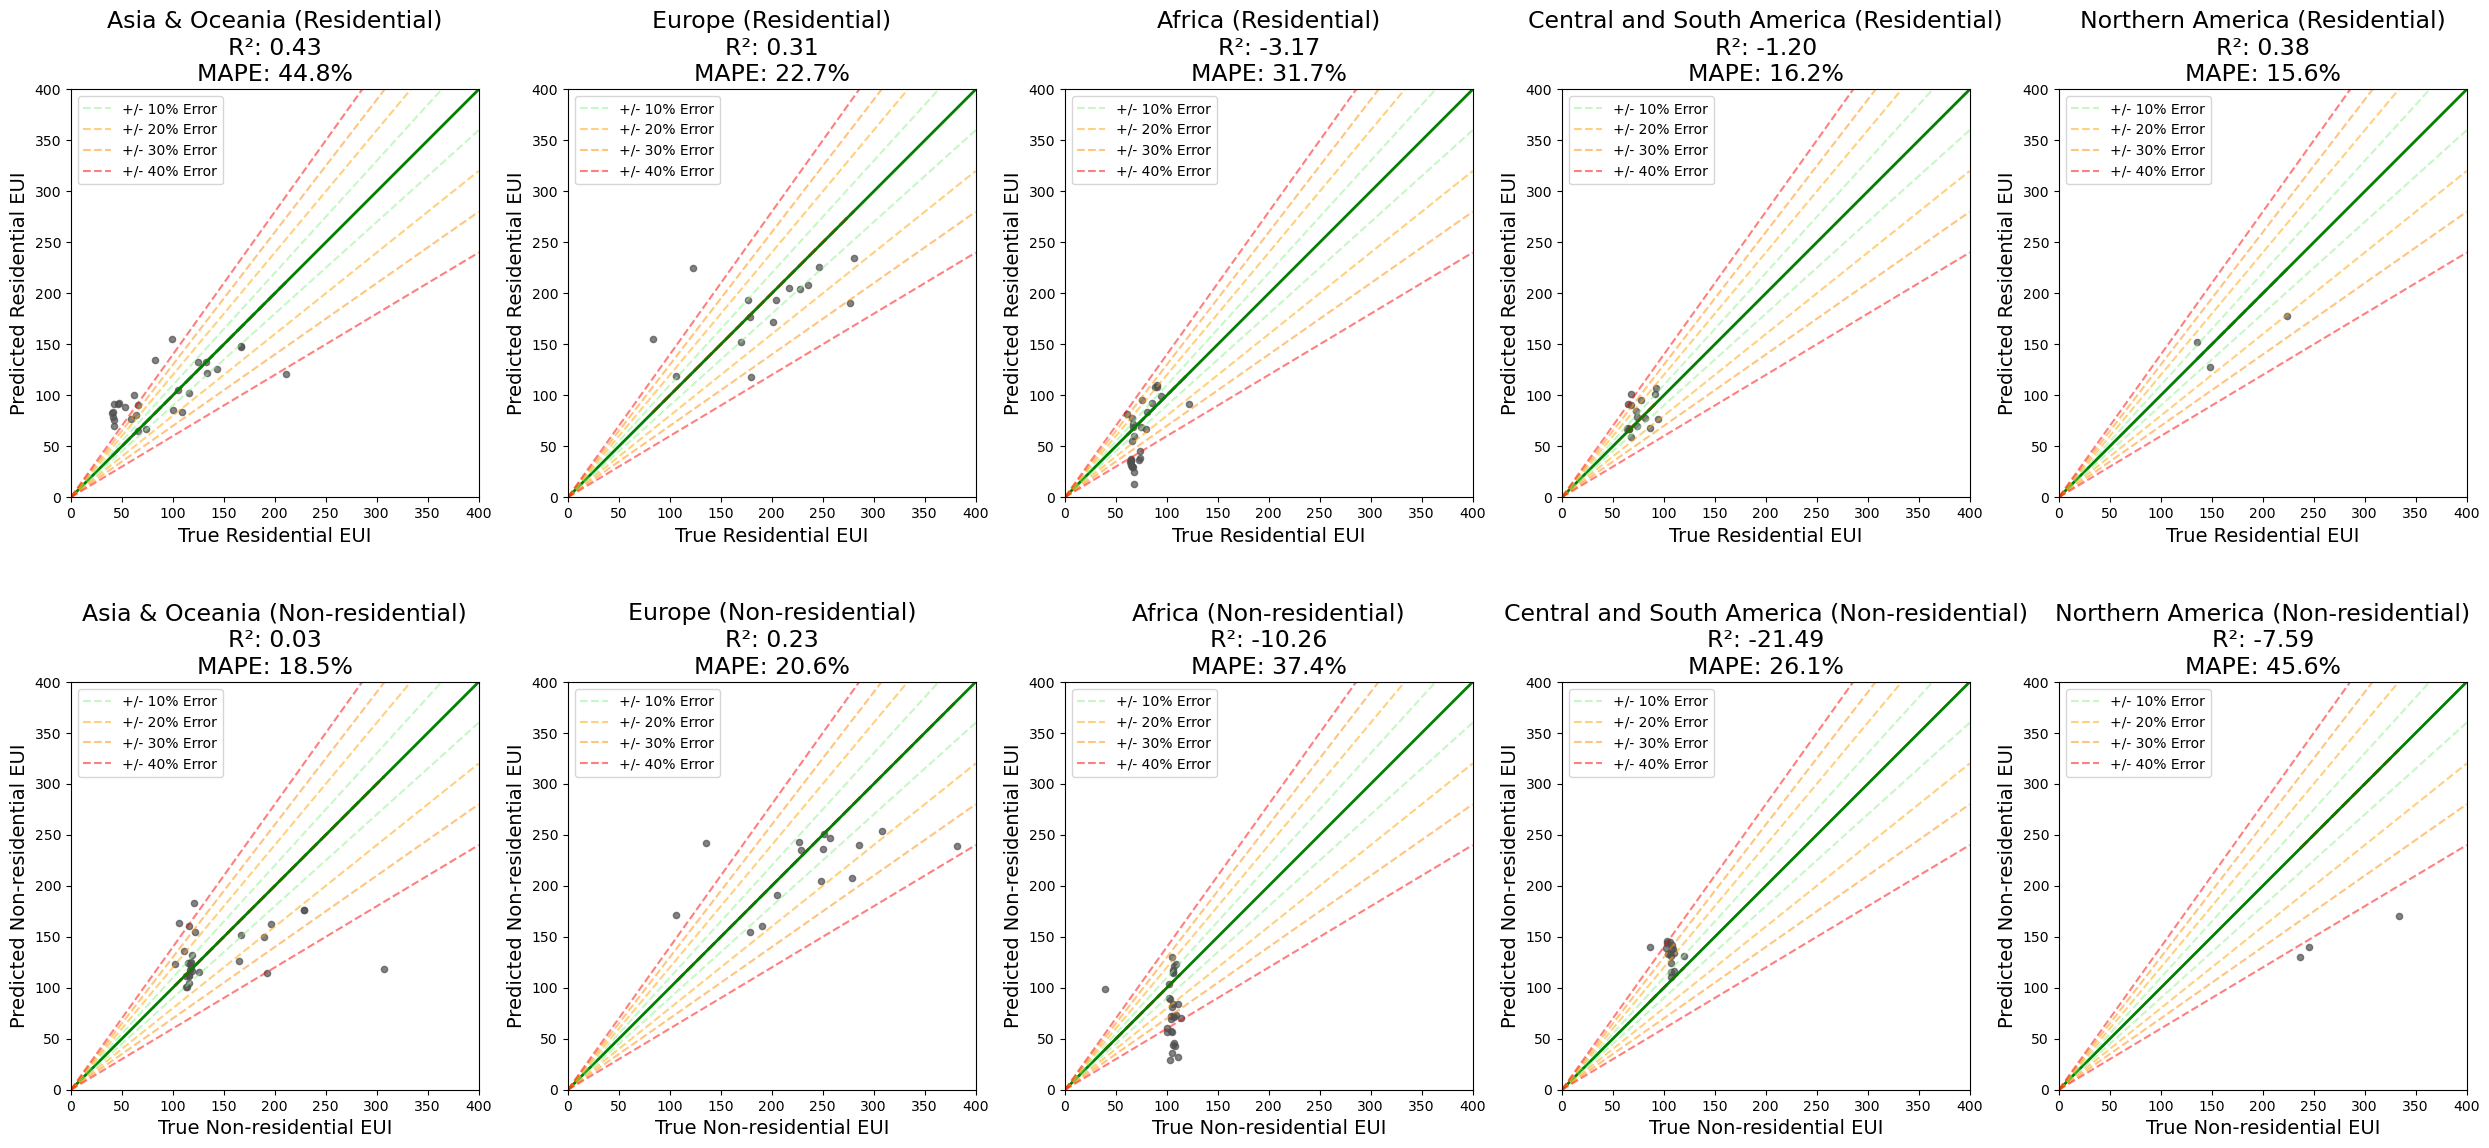

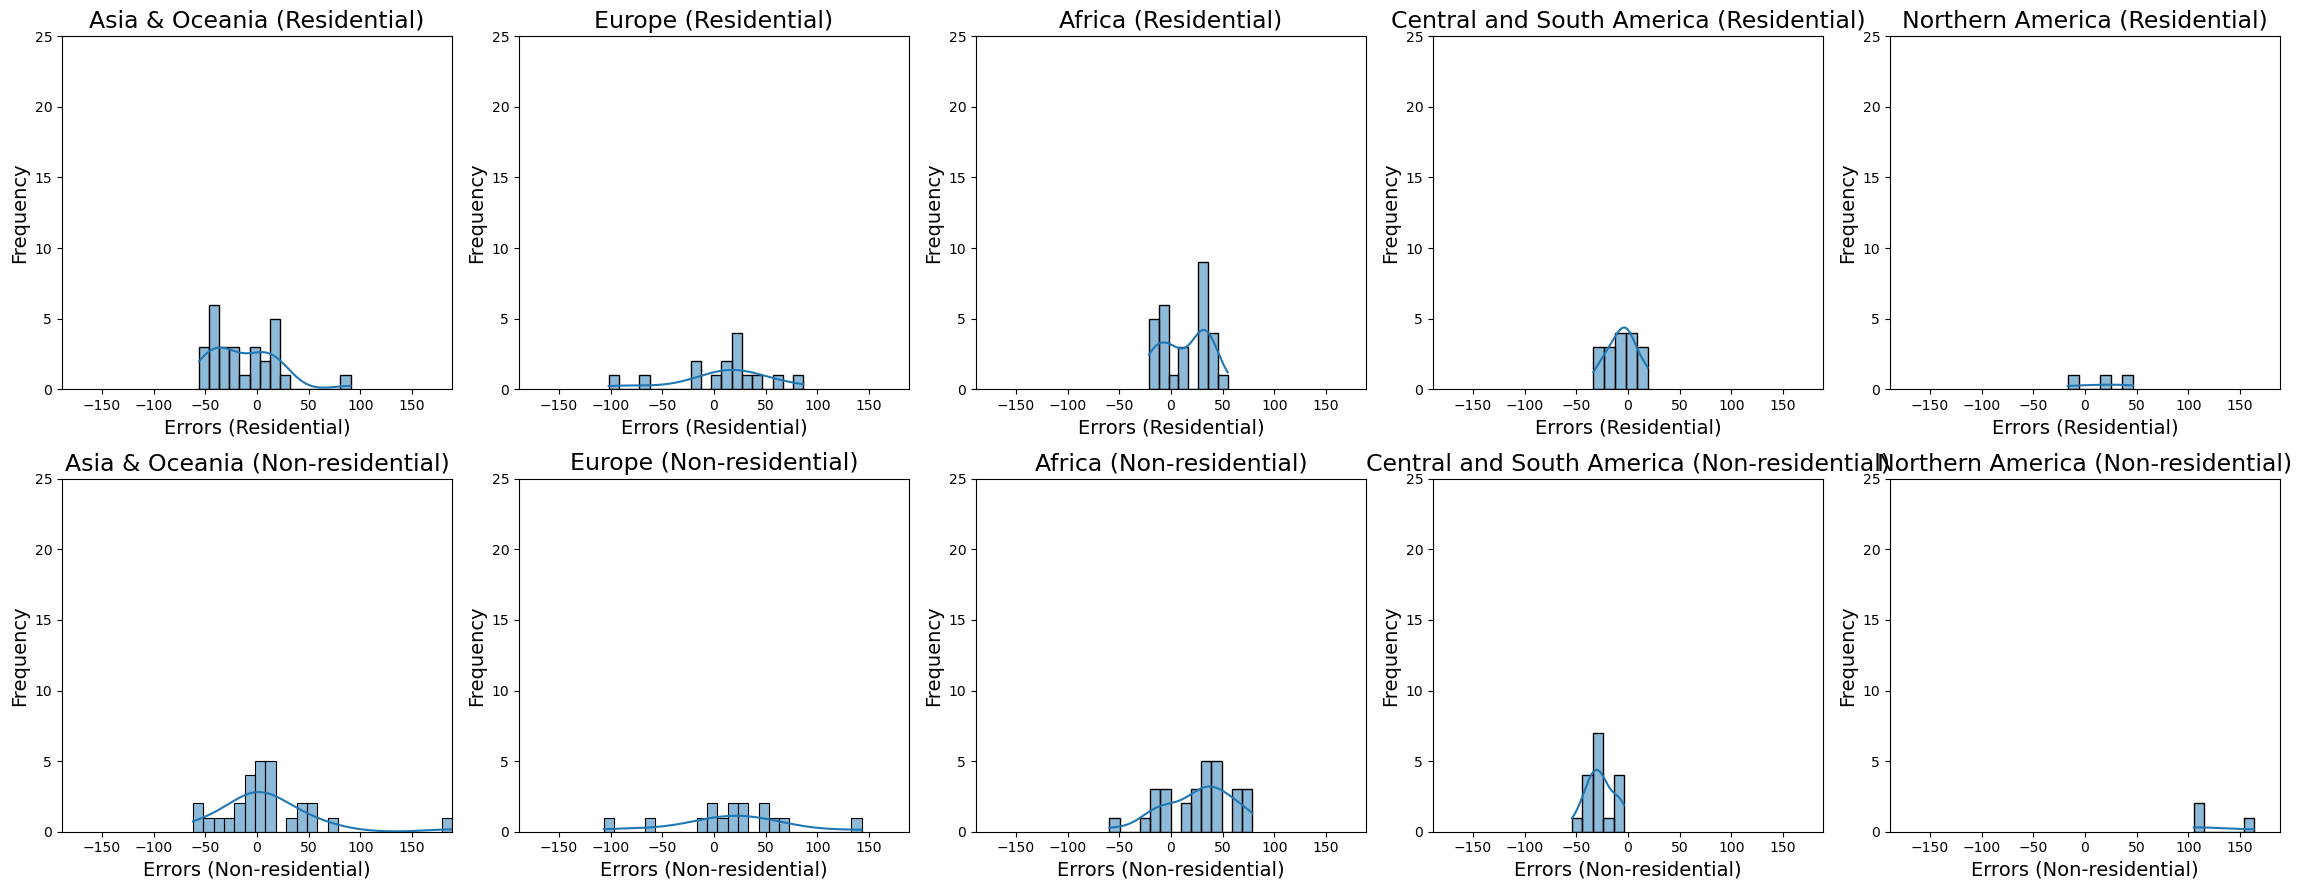

In [18]:
# Cross-domain with Lasso
model_lasso_cross = Lasso(**lasso_params)
results_lasso_cross = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features, 
    model=model_lasso_cross,
    strategy='cross_domain'
)

create_eui_comparison_plots(results_lasso_cross,
    save_path='../figures/model_plots/lasso_cross_domain_eui_predictions.png')

create_error_distribution_plots(results_lasso_cross,
    save_path='../figures/model_plots/lasso_cross_domain_error_distribution.png')


### Linear Regression - Lasso - All Domain

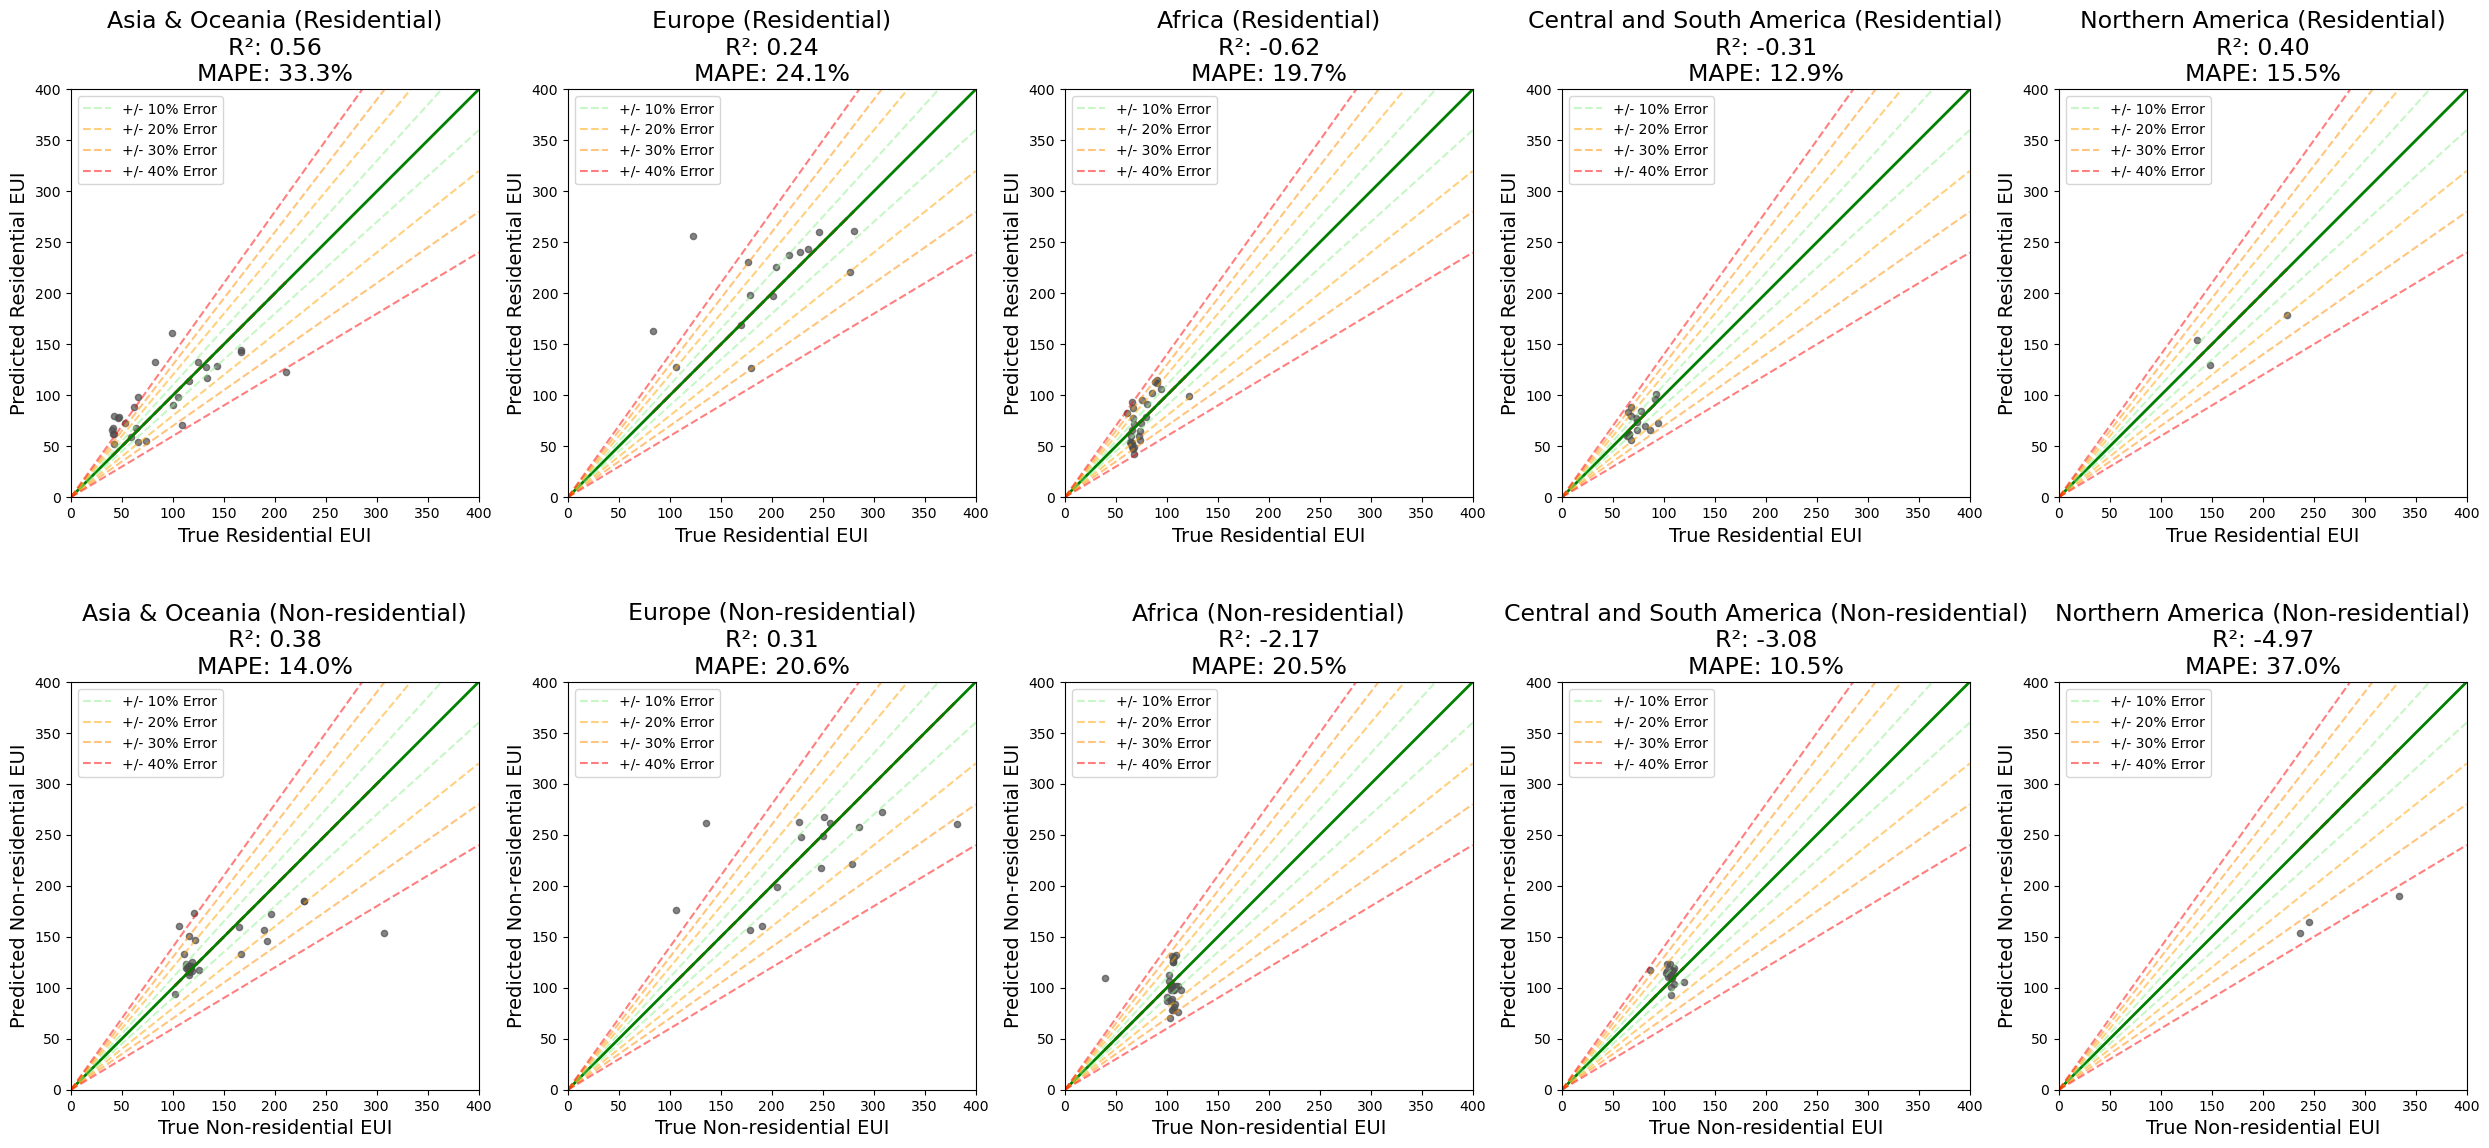

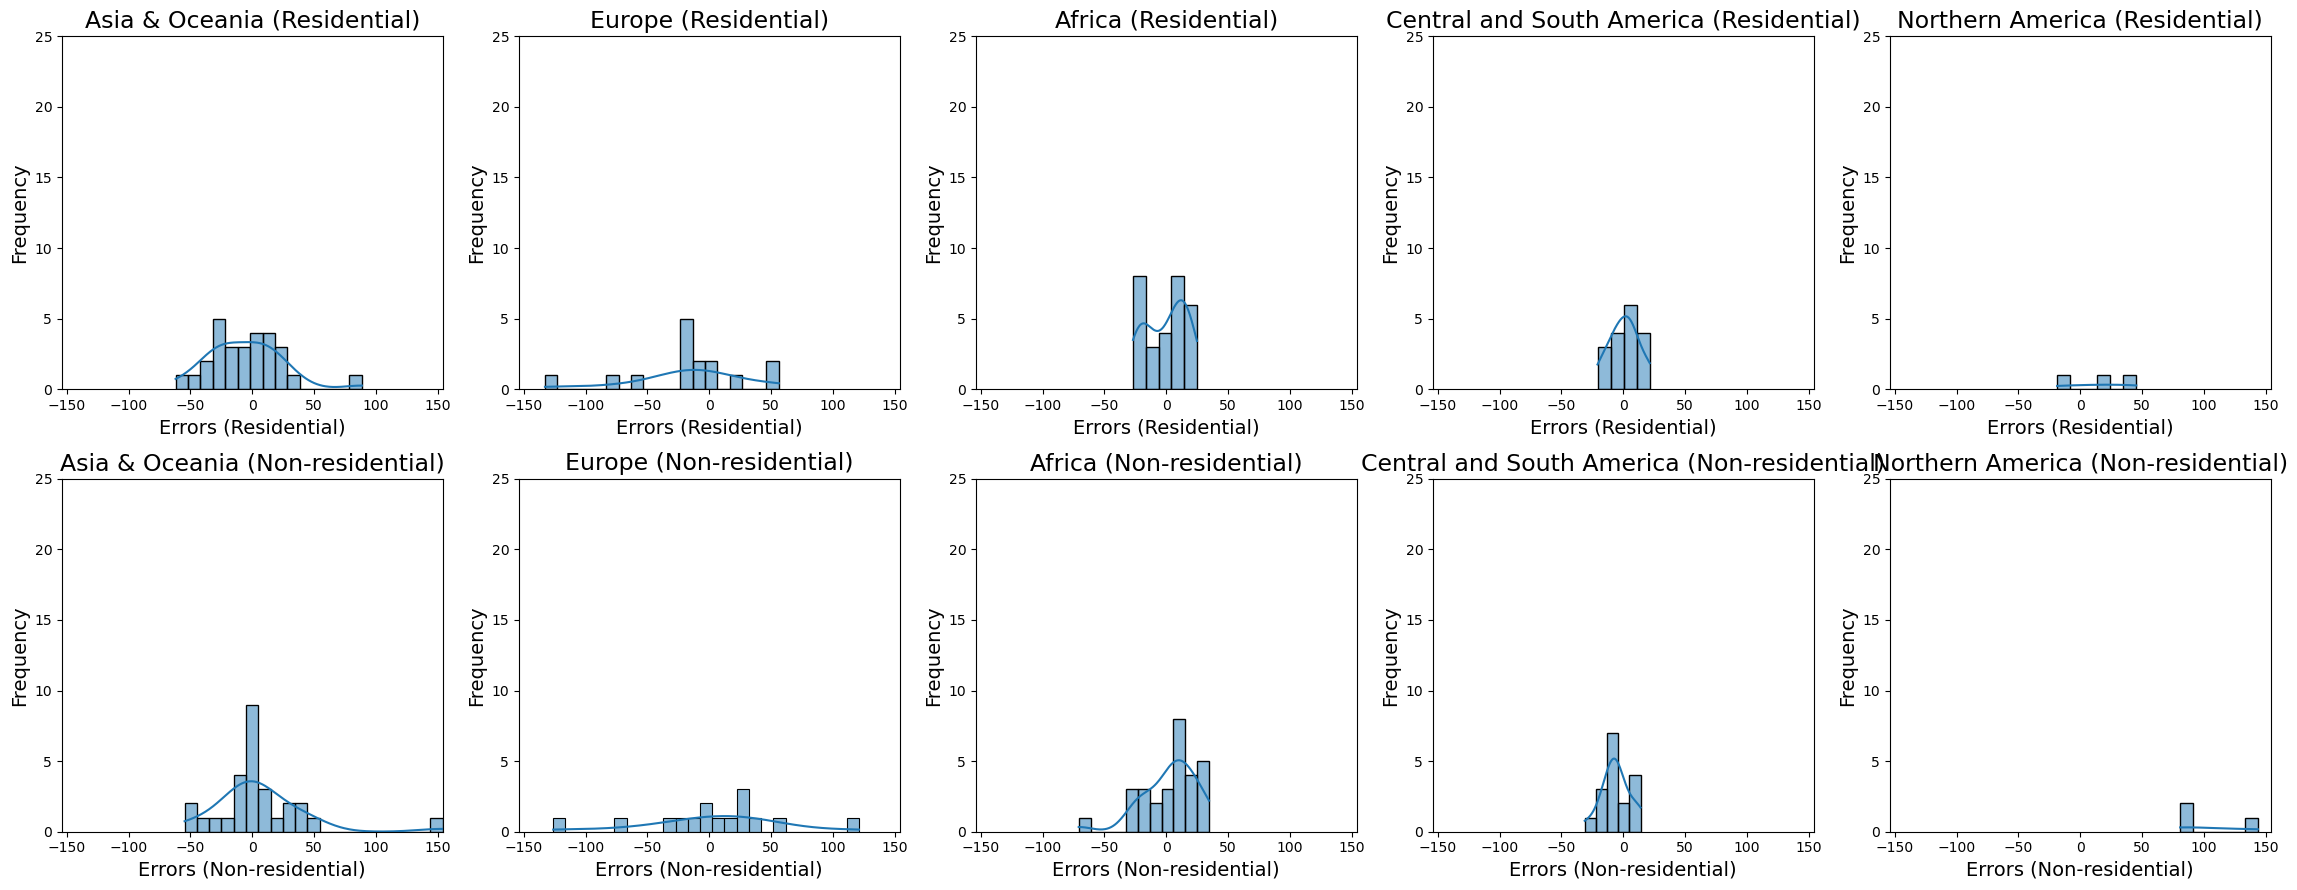

In [19]:
# All-domain with Lasso
model_lasso_all = Lasso(**lasso_params)
results_lasso_all = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features,
    model=model_lasso_all, 
    strategy='all_domain'
)

create_eui_comparison_plots(results_lasso_all,
    save_path='../figures/model_plots/lasso_all_domain_eui_predictions.png')

create_error_distribution_plots(results_lasso_all,
    save_path='../figures/model_plots/lasso_all_domain_error_distribution.png')

In [20]:
LassoModel = lambda: Lasso(**lasso_params)

lasso_detailed_results = evaluate_model_strategies(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model_type=LassoModel,  
   feature_abbreviations=feature_abbreviations,
   model_details="Lasso, " + ", ".join(f"{k} = {v}" for k, v in lasso_params.items())
)

lasso_detailed_results['Model'] = 'LR Lasso'
lasso_average_results = calculate_average_metrics(lasso_detailed_results).reset_index()
lasso_average_results

Target       Strategy     Model  \
0  Non-residential EUI (kWh/m2/year)  within_domain  LR Lasso   
1  Non-residential EUI (kWh/m2/year)   cross_domain  LR Lasso   
2  Non-residential EUI (kWh/m2/year)     all_domain  LR Lasso   
3      Residential EUI (kWh/m2/year)  within_domain  LR Lasso   
4      Residential EUI (kWh/m2/year)   cross_domain  LR Lasso   
5      Residential EUI (kWh/m2/year)     all_domain  LR Lasso   

        Model Details                                      Features Used  \
0  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
1  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
2  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
3  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
4  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
5  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   

                                Features Abbreviated   MAPE     R²       MSE  \
0  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  13.32  0.005  1660.452   
1  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  29.64 -7.815  4928.009   
2  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  20.52 -1.909  3299.595   
3  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  18.48  0.250  1315.901   
4  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  26.20 -0.652  1048.168   
5  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  21.10  0.055   923.459   

     RMSE     MAE   WAPE  
0  33.879  23.245  11.72  
1  61.129  52.199  29.10  
2  46.986  38.843  19.60  
3  29.214  21.485  16.20  
4  30.712  25.334  22.72  
5  27.488  22.005  18.72

In [21]:
lasso_detailed_results.to_csv(f'../results/{timestamp}_lasso_detailed_results.csv')
lasso_average_results.to_csv(f'../results/{timestamp}_lasso_average_results.csv')